In [22]:
import numpy as np
# from functions import *
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from itertools import combinations


def basis_set_generator(tot_sites, N_e_up, N_e_down):
    spin_up_basis = []
    spin_down_basis = []

    for comb_up in combinations(range(tot_sites), N_e_up):
        state = [0] * tot_sites
        for idx in comb_up:
            state[idx] = 1
        spin_up_basis.append(state)

    for comb_down in combinations(range(tot_sites), N_e_down):
        state = [0] * tot_sites
        for idx in comb_down:
            state[idx] = 1
        spin_down_basis.append(state)

    basis = []

    for up_state in spin_up_basis:
        for down_state in spin_down_basis:
            basis.append(up_state + down_state)
    
    return np.array(basis)


def creation_operator(state, site):
    
    res_state = state.copy()
    
    if state[site] == 1:
        return 0, None
    
    sign = 1
    for i in range(site):
        if state[i] == 1:
            sign = sign * -1
    
    res_state[site] = 1
    return sign, res_state


def annihilation_operator(state, site):
    
    res_state = state.copy()
    
    if state[site] == 0:
        return 0, None
    
    sign = 1
    for i in range(site):
        if state[i] == 1:
            sign = sign * -1
    
    res_state[site] = 0
    return sign, res_state


def hopping_operator(state, create_site, destroy_site):

    if (state[create_site] == 1) and (state[destroy_site] == 0):
        return 0, None

    sign_destroy, res_state = annihilation_operator(state, destroy_site)
    
    sign_create, res_state = creation_operator(res_state, create_site)

    return (sign_create * sign_destroy), res_state


def state_idx_mapping(basis_set):
    return {tuple(state) : i for i, state in enumerate(basis_set)}


def hamiltonian_matrix_generator(basis_set, tot_sites, J_11, J_1, J_33, J_3):
    dim = len(basis_set)
    hamiltonian = np.zeros((dim, dim), dtype=np.float64)
    state_idx_dict = state_idx_mapping(basis_set)

    for i, state in enumerate(basis_set):
        for j in range(tot_sites):
            for k in [0, tot_sites]:
                l = j + k
                # print(l)

                if state[l] == 0:
                    continue

                if (l + 1) < (tot_sites + k): # J_11 & J_1 terms
                    if state[l + 1] == 0:
                        destroy_site = l
                        create_site = l + 1
                        # print(initial_position, target_position)
                        sign, res_state = hopping_operator(state, create_site, destroy_site)
                        # print(sign, res_state)

                        # if sign == 0:
                        #     continue

                        res_state_idx = state_idx_dict[tuple(res_state)]
                        # print(res_state_idx)

                        # print(f"{i} ---- {state} ---- {destroy_site} ---- {create_site} ---- {sign} ---- {res_state} ---- {res_state_idx}")

                        if l % 2 == 0:
                            hamiltonian[res_state_idx, i] += J_11 * sign
                        else:
                            hamiltonian[res_state_idx, i] += J_1 * sign
                
                if l - 1 >= k: # Hermitian conjugate of J_11 & J_1 terms
                    if state[l - 1] == 0:
                        destroy_site = l
                        create_site = l - 1
                        # print(initial_position, target_position)
                        sign, res_state = hopping_operator(state, create_site, destroy_site)
                        # print(sign, res_state)

                        # if sign == 0:
                        #     continue

                        res_state_idx = state_idx_dict[tuple(res_state)]
                        # print(res_state_idx)

                        # print(f"{i} ---- {state} ---- {destroy_site} ---- {create_site} ---- {sign} ---- {res_state} ---- {res_state_idx}")

                        if l % 2 == 0:
                            hamiltonian[res_state_idx, i] += J_1 * sign
                        else:
                            hamiltonian[res_state_idx, i] += J_11 * sign
                
                if (l + 3) < (tot_sites + k): # J_33 & J_3 terms
                    if state[l + 3] == 0:
                        destroy_site = l
                        create_site = l + 3
                        # print(initial_position, target_position)
                        sign, res_state = hopping_operator(state, create_site, destroy_site)
                        # print(sign, res_state)

                        # if sign == 0:
                        #     continue

                        res_state_idx = state_idx_dict[tuple(res_state)]
                        # print(res_state_idx)

                        # print(f"{i} ---- {state} ---- {destroy_site} ---- {create_site} ---- {sign} ---- {res_state} ---- {res_state_idx}")

                        if l % 2 == 0:
                            hamiltonian[res_state_idx, i] += J_33 * sign
                        else:
                            hamiltonian[res_state_idx, i] += J_3 * sign
                
                if (l - 3) >= k: # Hermitian conjugate of J_33 & J_3 terms
                    if state[l - 3] == 0:
                        destroy_site = l
                        create_site = l - 3
                        # print(initial_position, target_position)
                        sign, res_state = hopping_operator(state, create_site, destroy_site)
                        # print(sign, res_state)

                        # if sign == 0:
                        #     continue

                        res_state_idx = state_idx_dict[tuple(res_state)]
                        # print(res_state_idx)

                        # print(f"{i} ---- {state} ---- {destroy_site} ---- {create_site} ---- {sign} ---- {res_state} ---- {res_state_idx}")

                        if l % 2 == 0:
                            hamiltonian[res_state_idx, i] += J_3 * sign
                        else:
                            hamiltonian[res_state_idx, i] += J_33 * sign
    
    return hamiltonian


In [3]:
tot_sites = 8
N_e_up = 4
N_e_down = N_e_up
J_11 = 1
J_1 = 2
J_33 = 3
J_3 = 4

basis_set = basis_set_generator(tot_sites, N_e_up, N_e_down)
# for i,state in enumerate(basis_set):
#     # print(str(state))
#     print(f"{state} ---- {i}")

hamiltonian = hamiltonian_matrix_generator(basis_set, tot_sites, J_11, J_1, J_33, J_3)

print(np.shape(hamiltonian))
print(sp.linalg.ishermitian(hamiltonian))
e_val, e_vec = sp.linalg.eigh(hamiltonian)

(4900, 4900)
True


In [16]:
topo_e_val = e_val[2376:2524]
e_vec_t = e_vec.transpose()
topo_e_vec = e_vec_t[2376:2524]

print(np.shape(topo_e_val))
print(np.shape(topo_e_vec))

(148,)
(148, 4900)


In [18]:
topo_e_vec_ps_wo_spin = np.zeros((len(topo_e_val), tot_sites * 2))

for j, state in enumerate(topo_e_vec):
    for i, element in enumerate(state):
        topo_e_vec_ps_wo_spin[j] += element * basis_set[i]

print(np.shape(topo_e_vec_ps_wo_spin))


(148, 16)


[0 1 2 3 4 5 6 7]


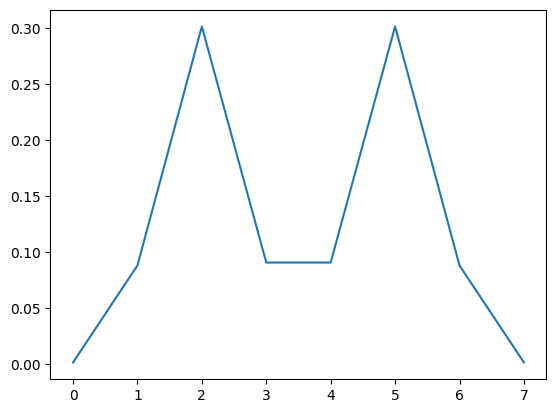

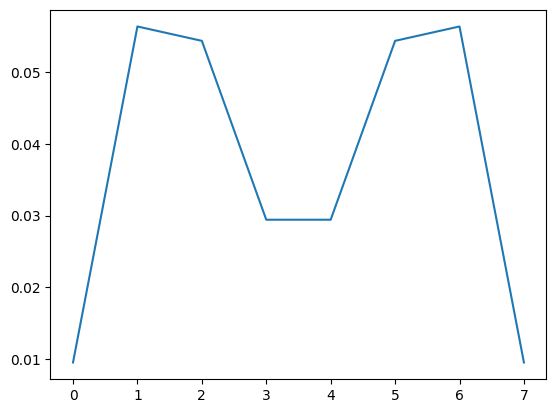

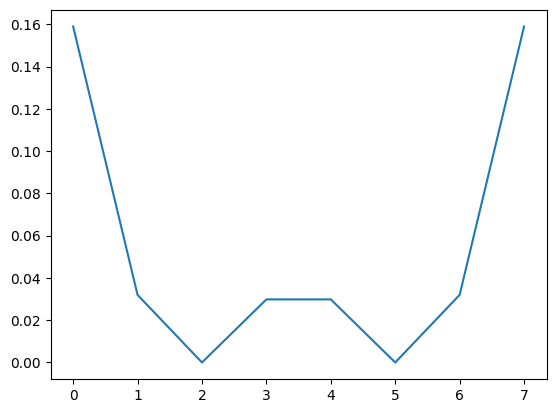

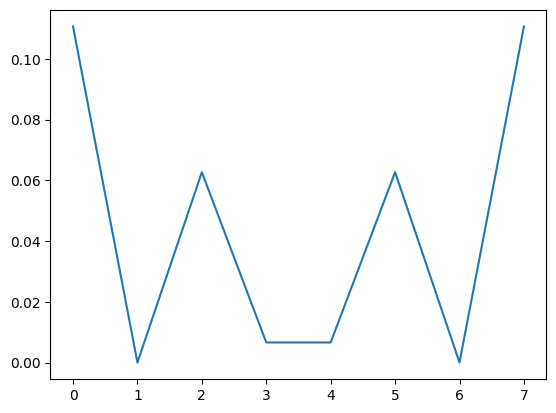

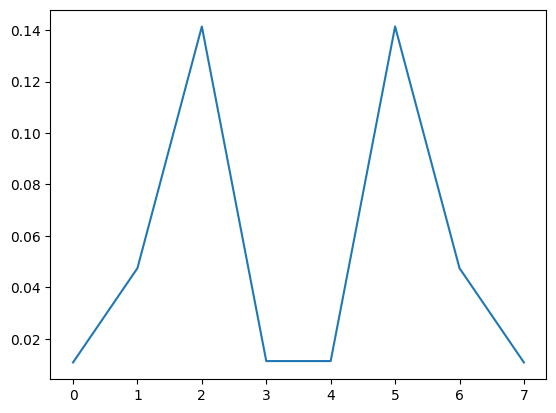

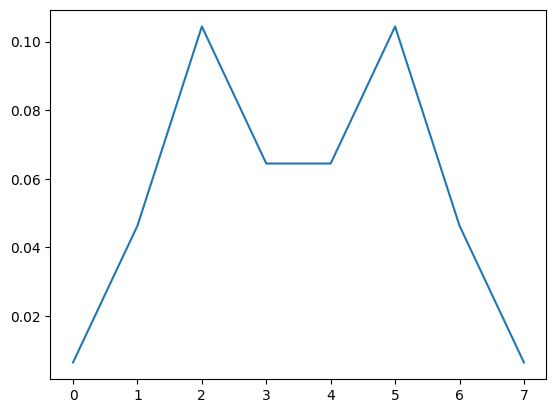

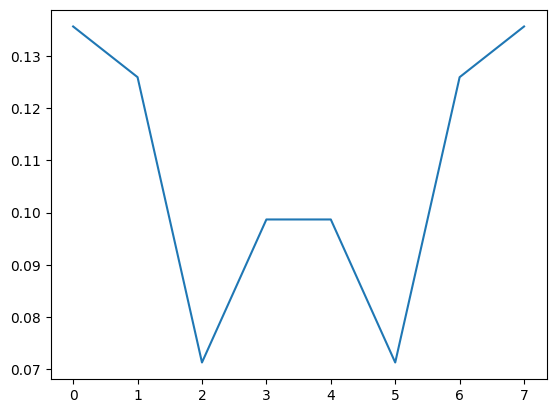

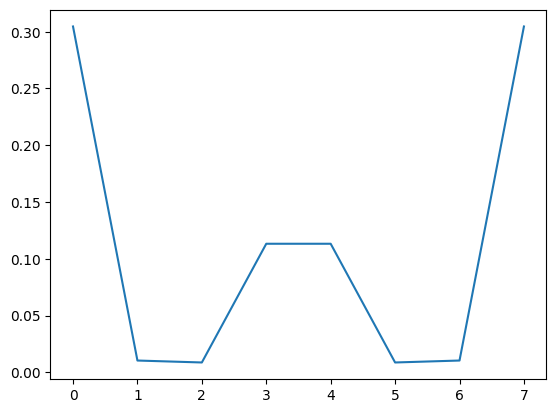

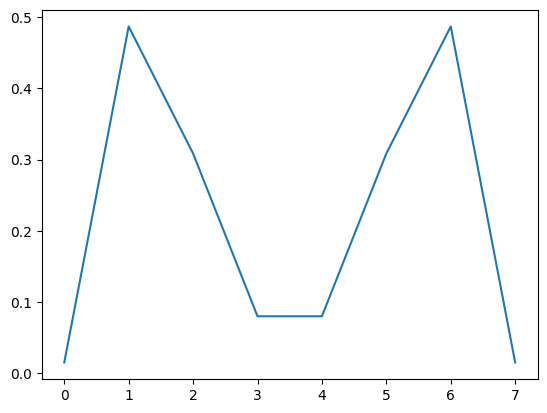

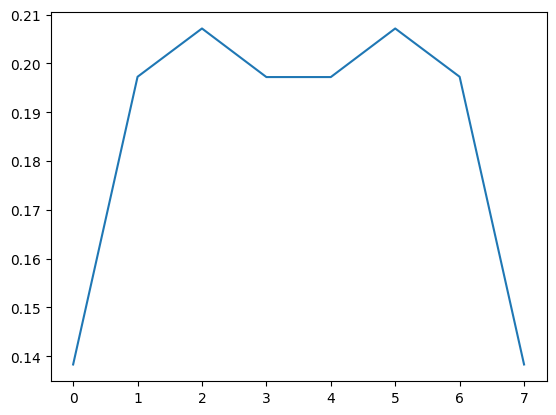

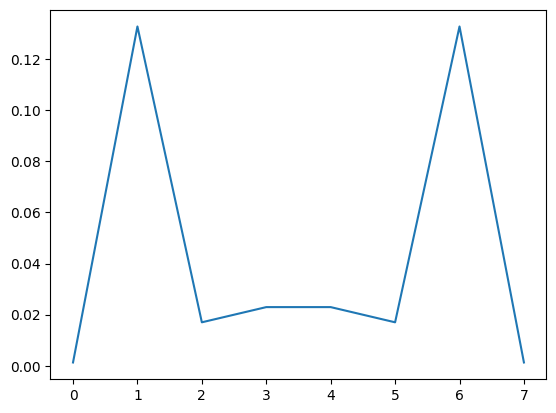

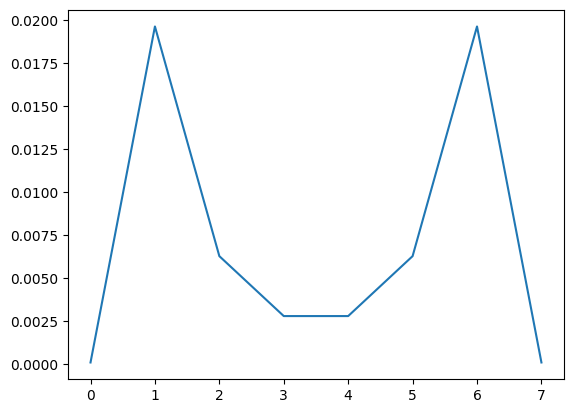

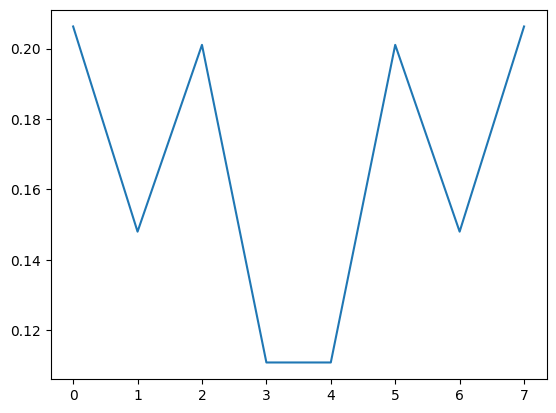

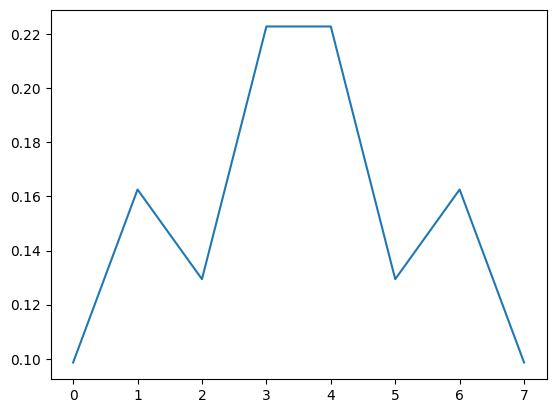

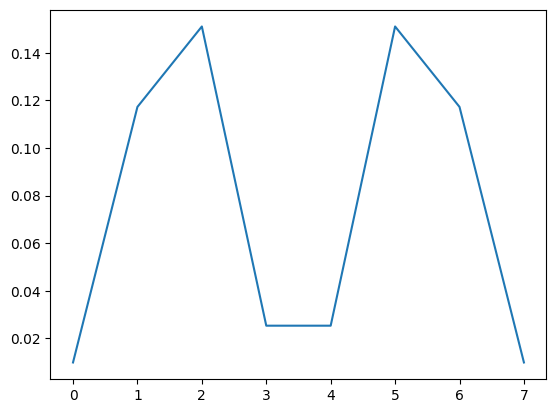

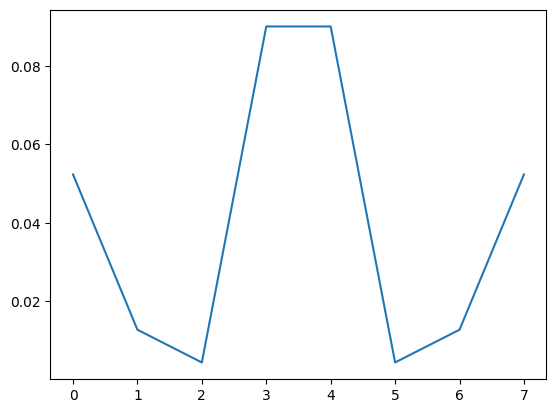

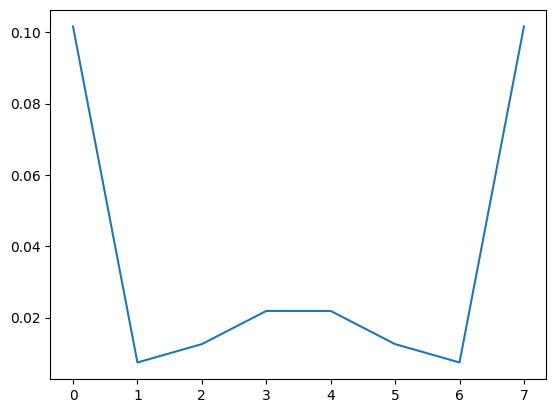

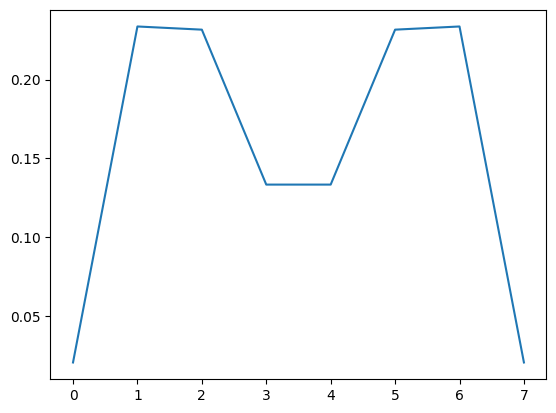

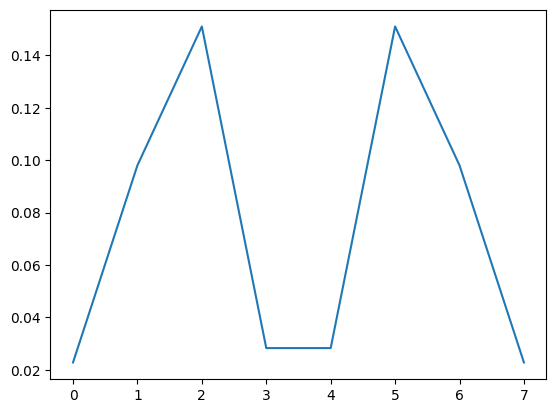

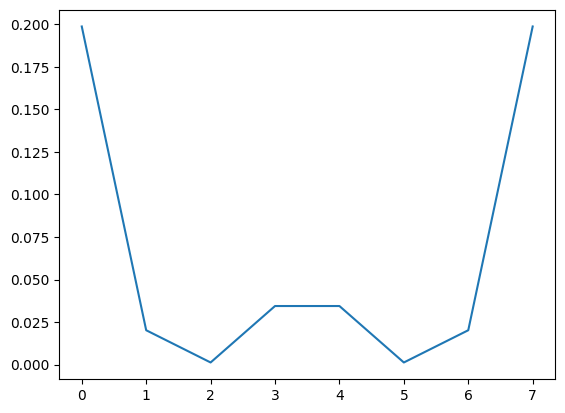

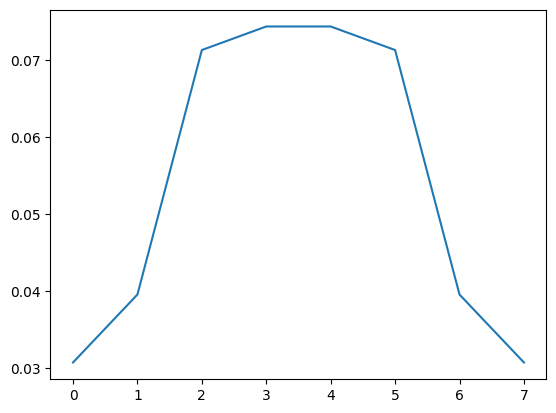

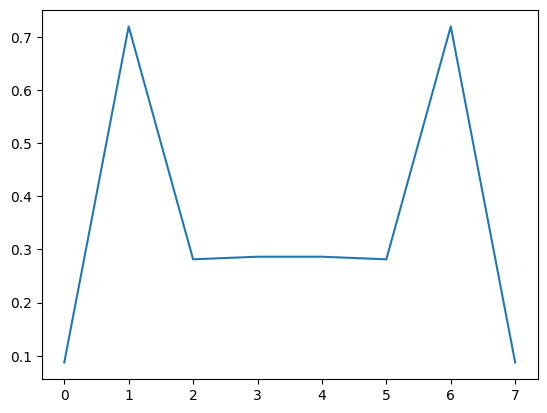

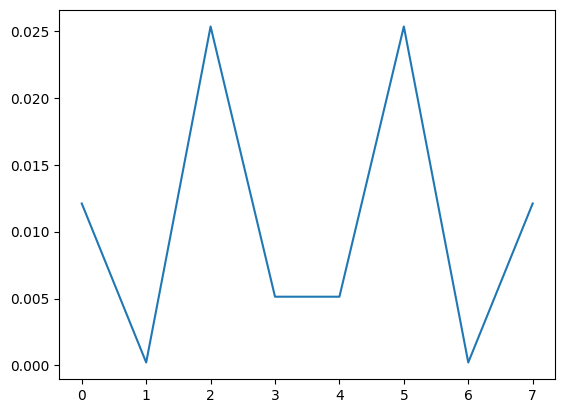

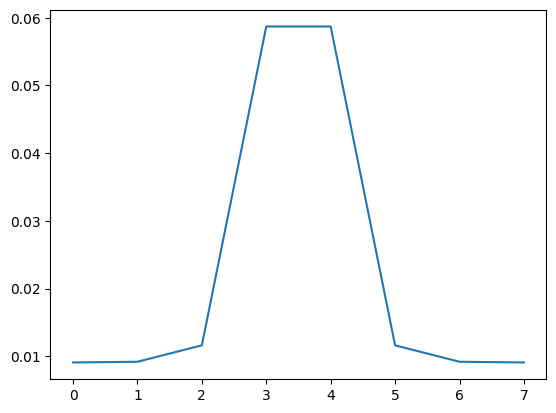

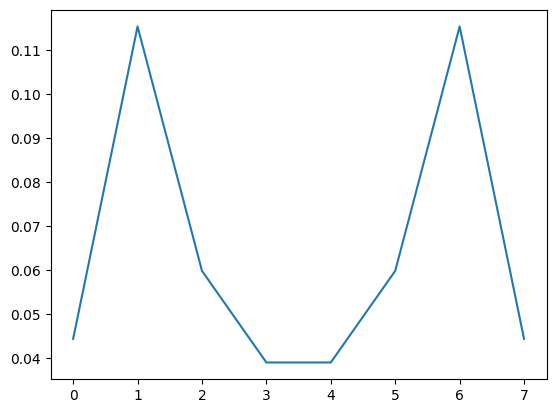

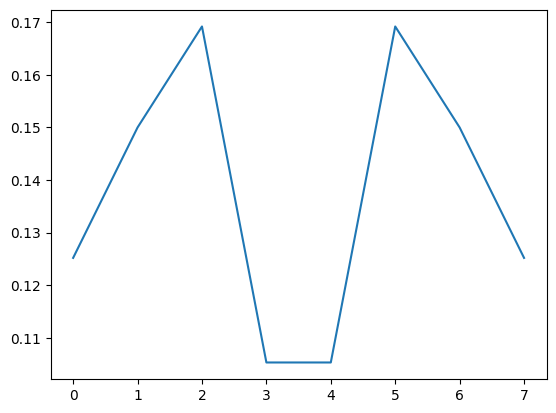

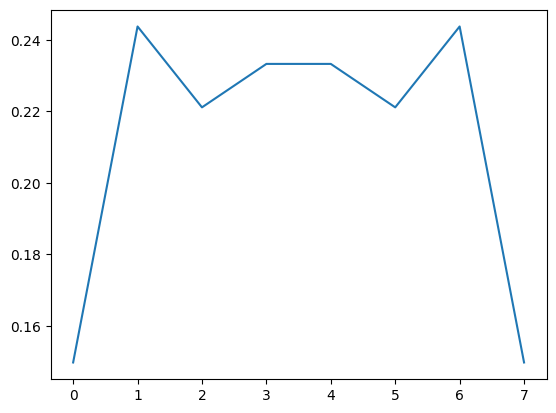

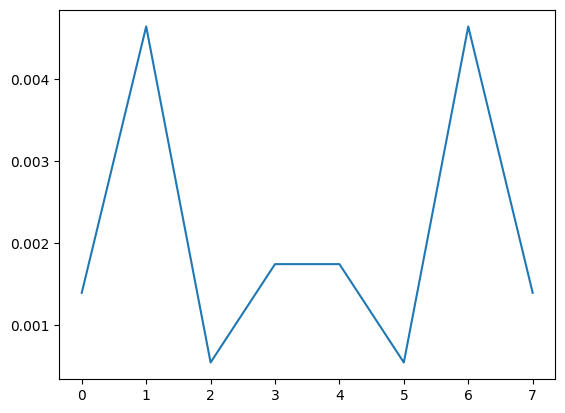

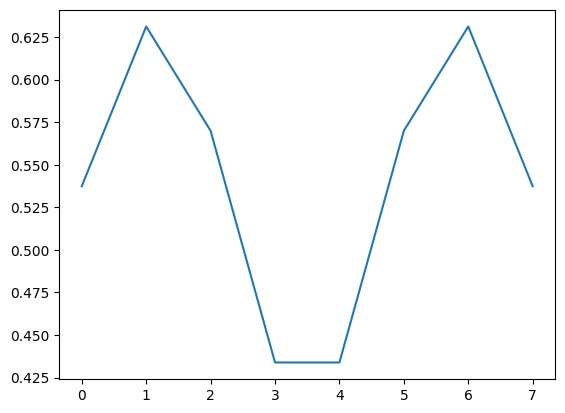

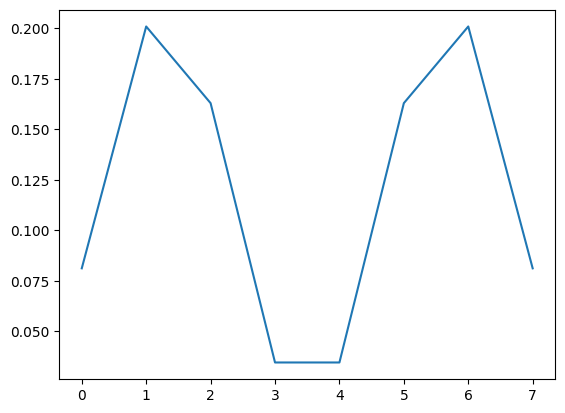

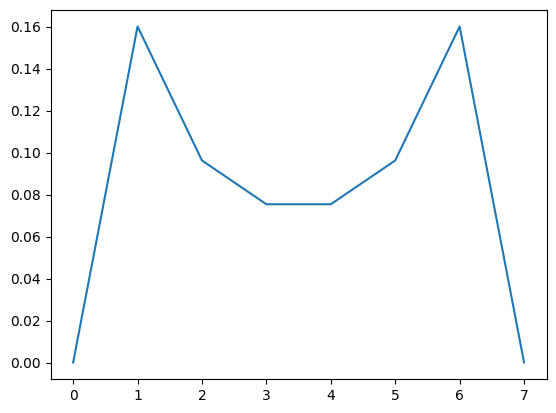

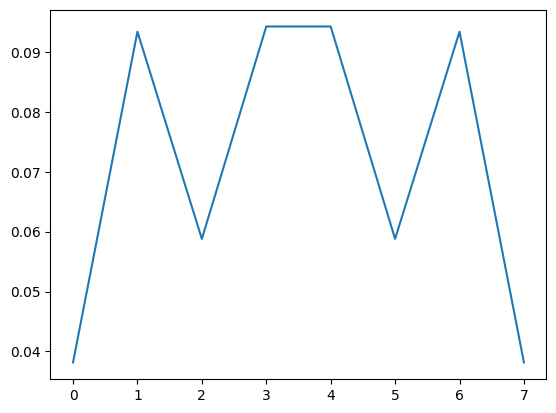

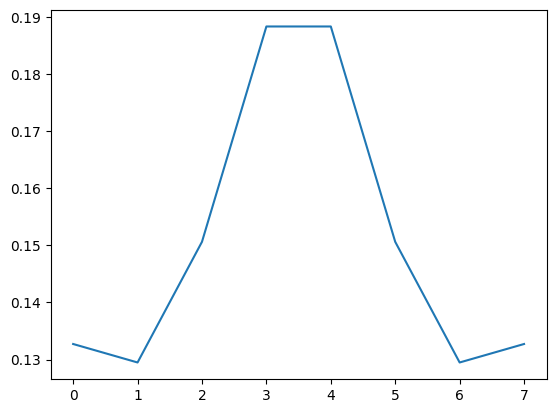

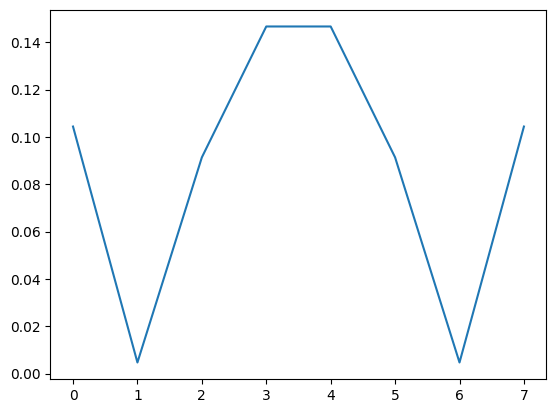

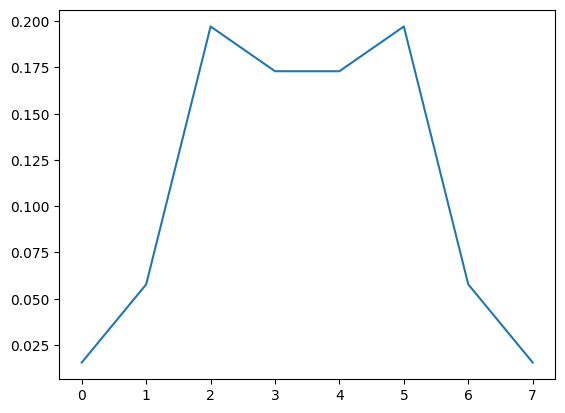

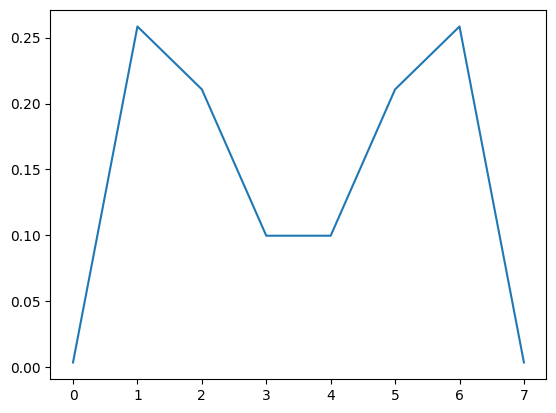

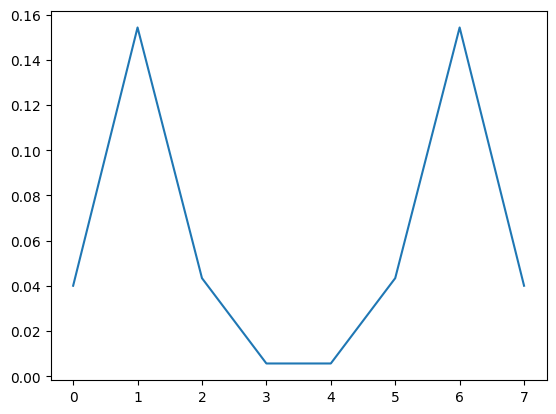

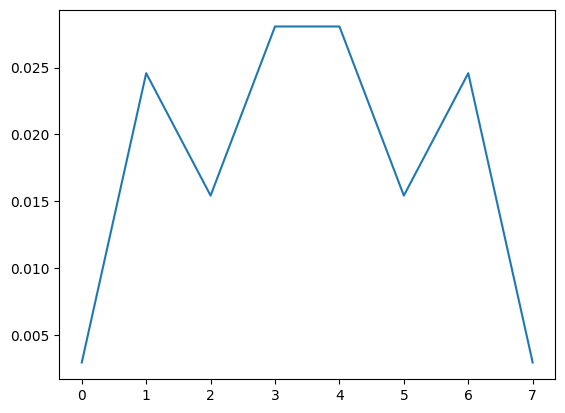

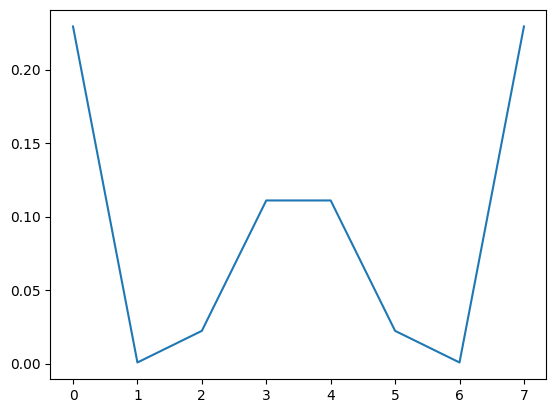

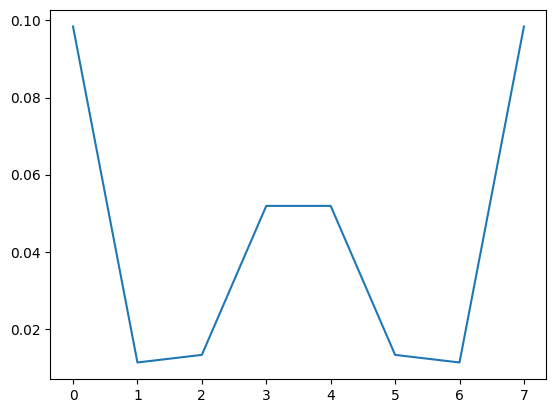

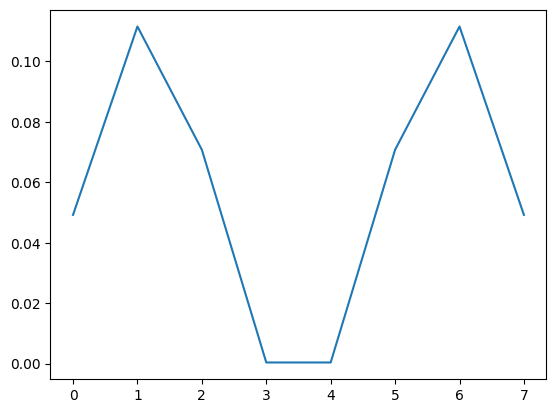

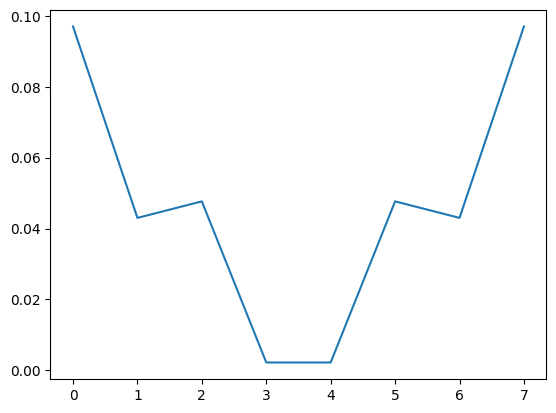

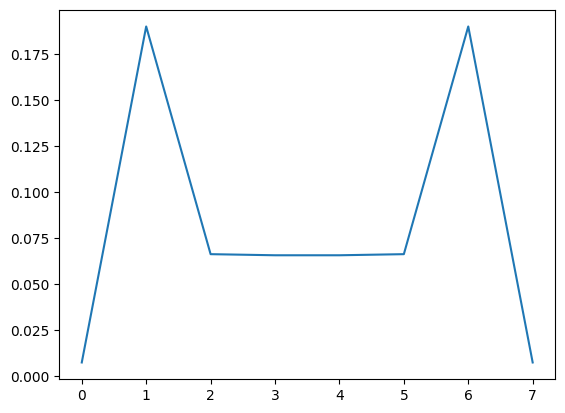

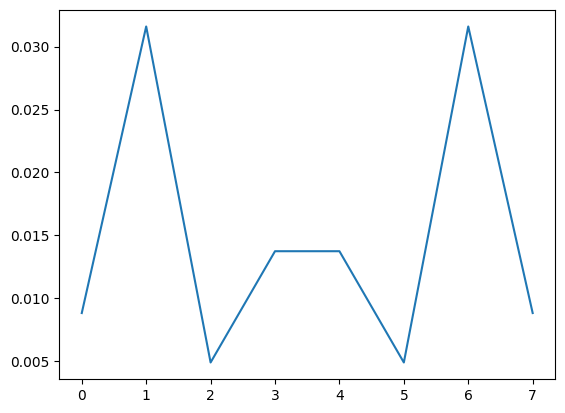

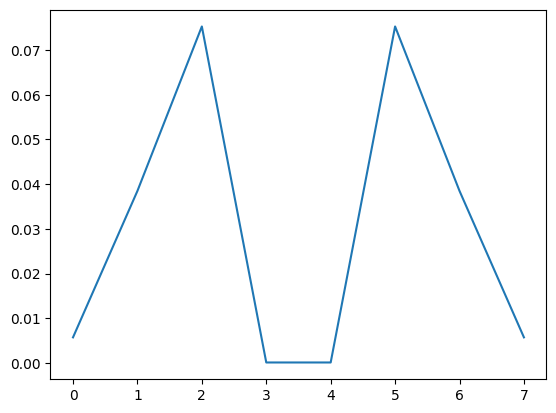

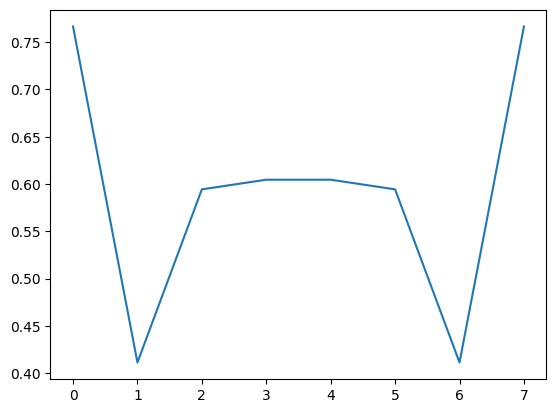

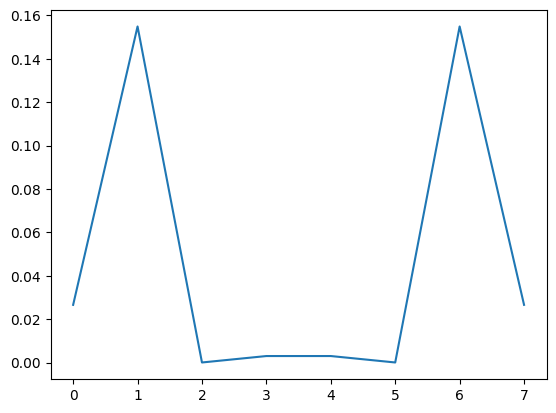

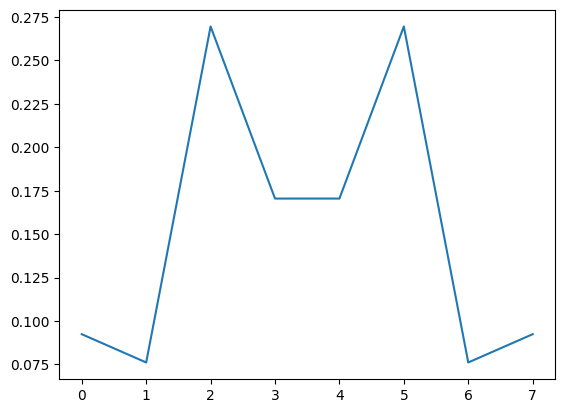

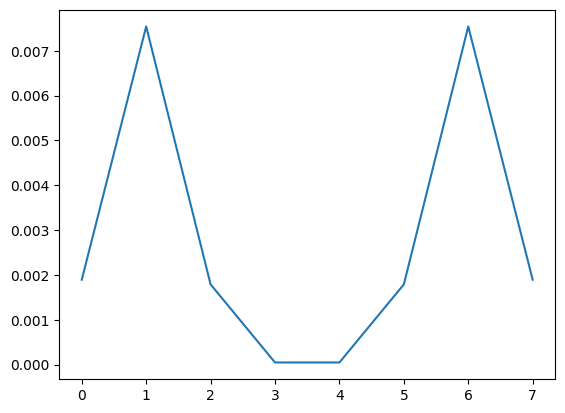

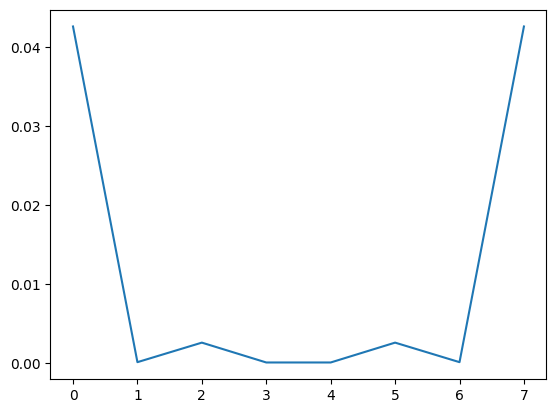

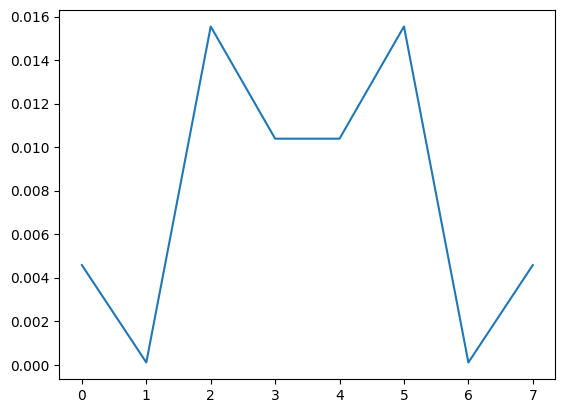

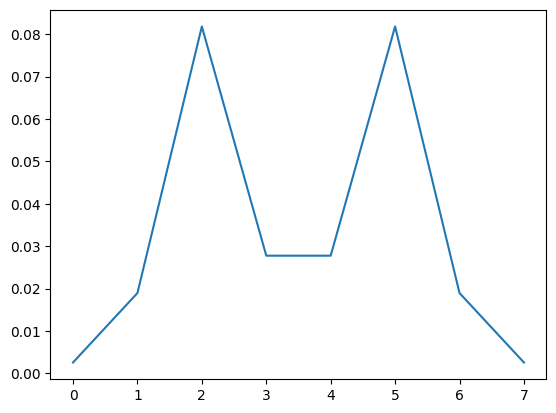

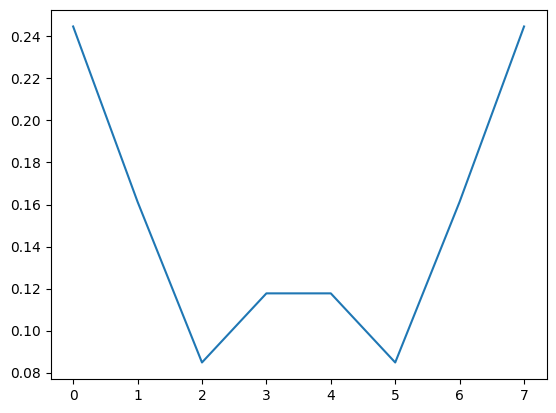

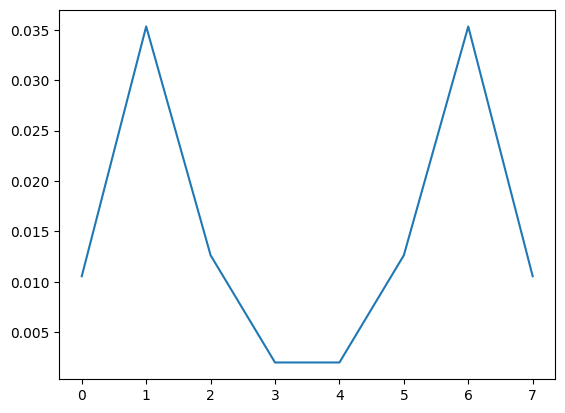

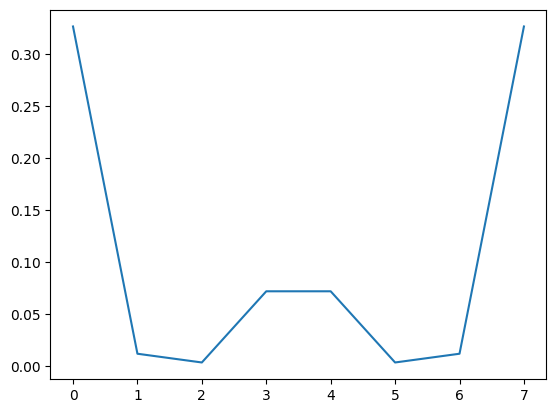

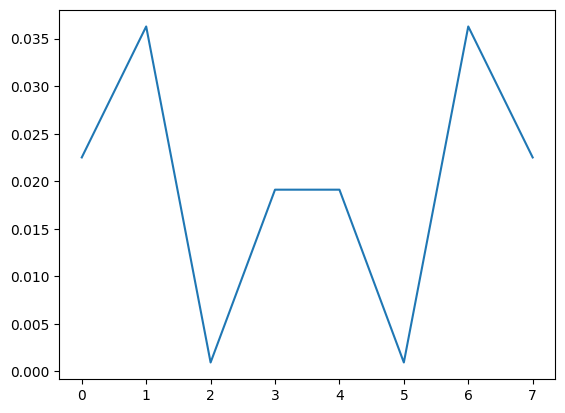

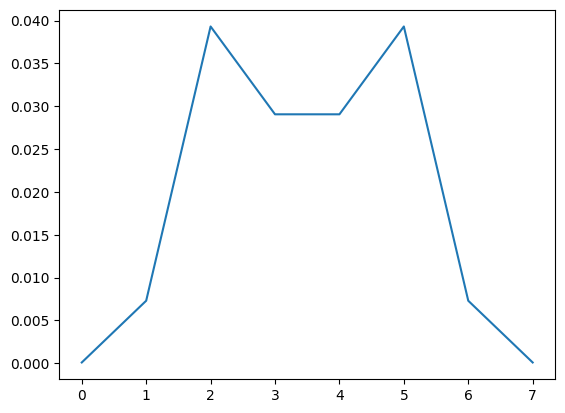

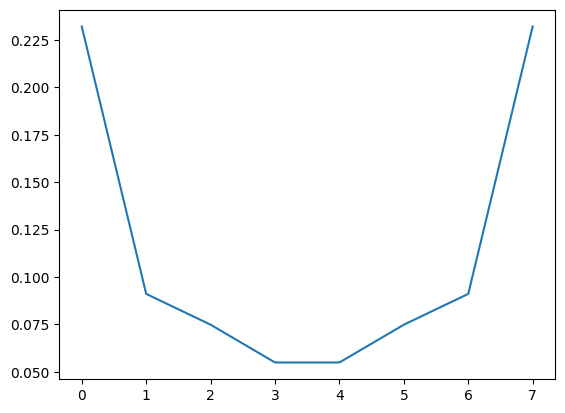

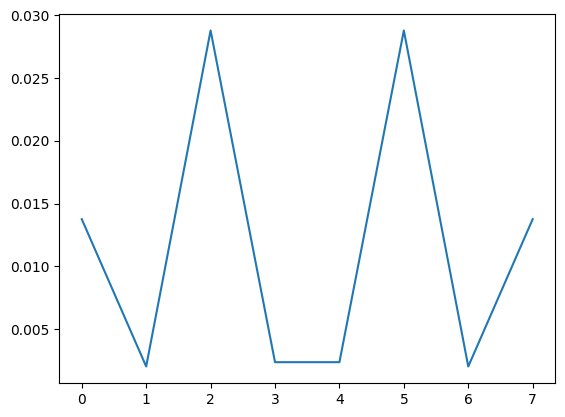

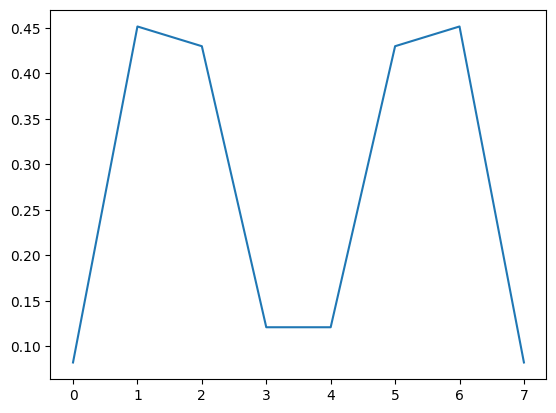

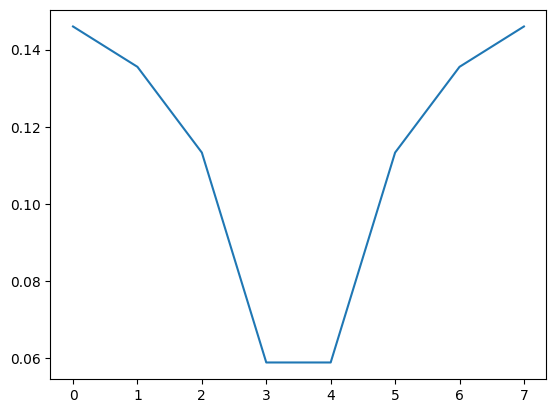

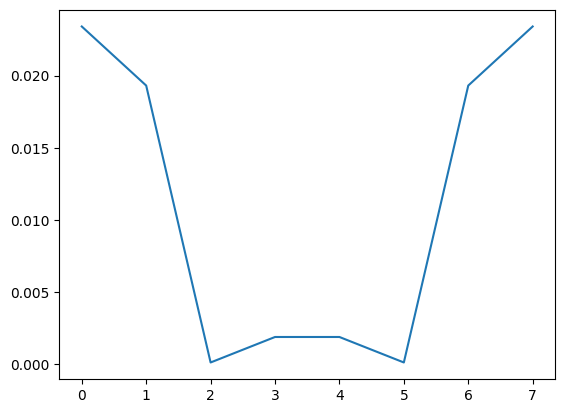

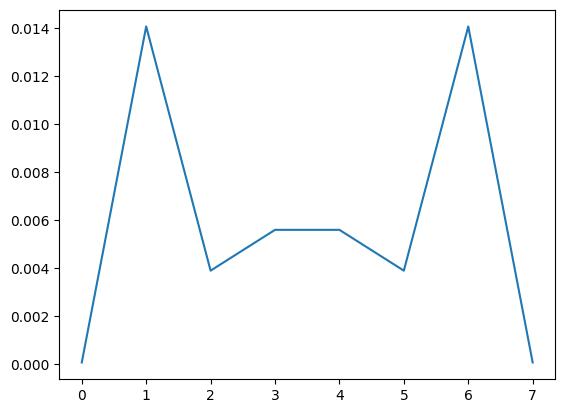

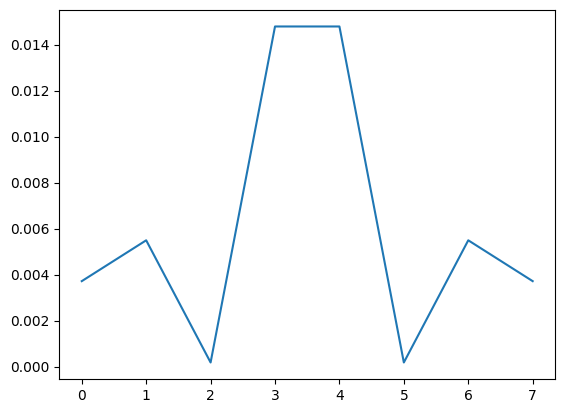

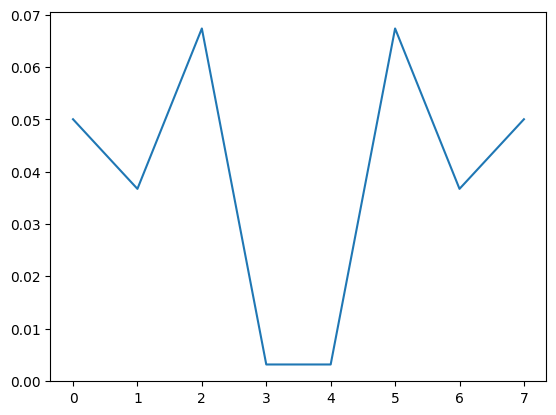

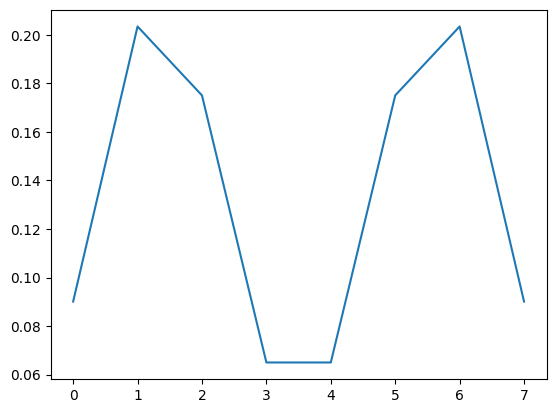

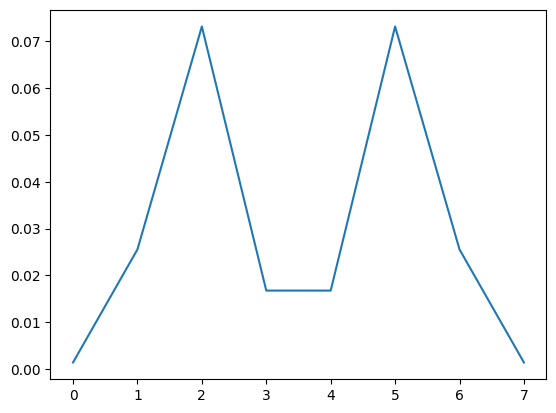

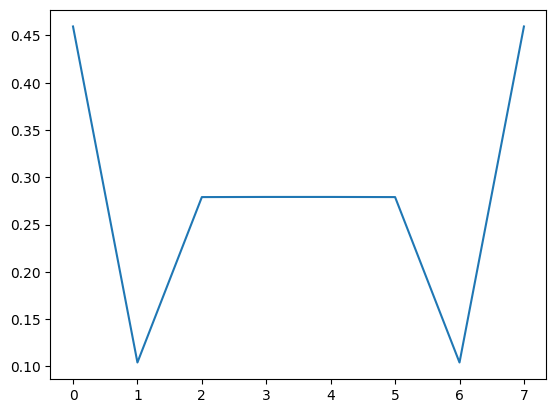

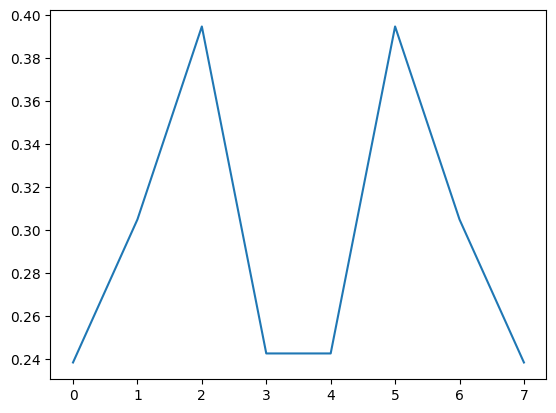

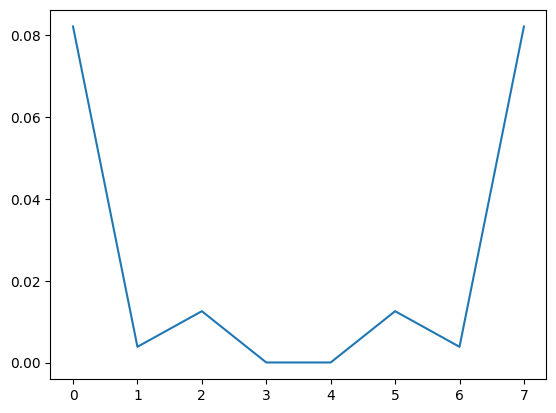

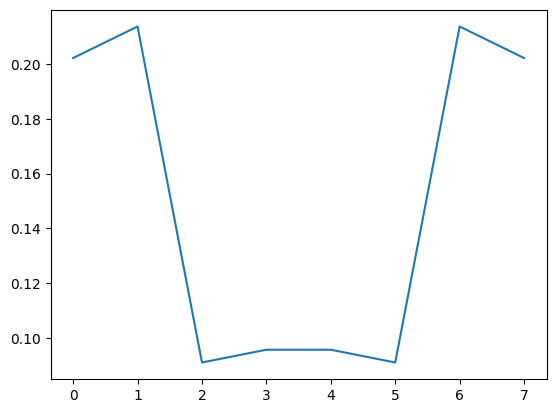

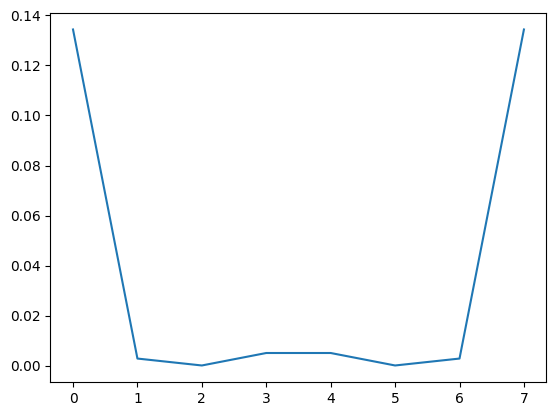

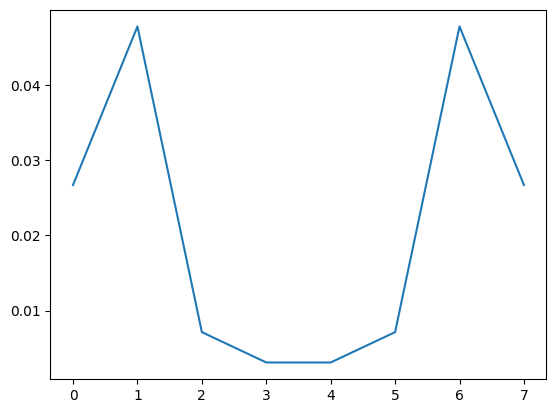

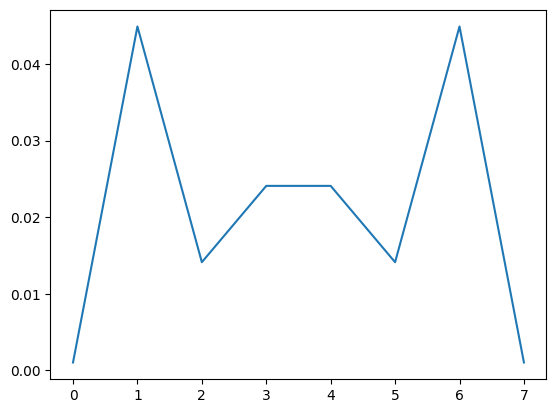

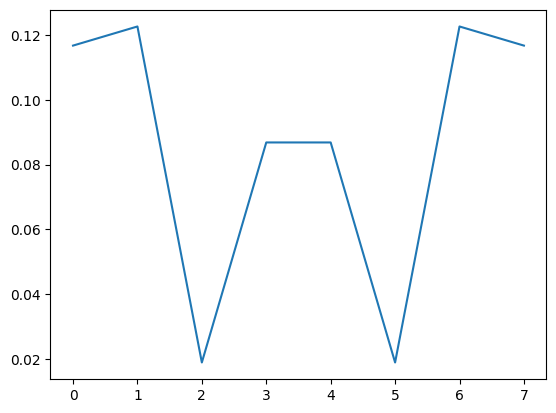

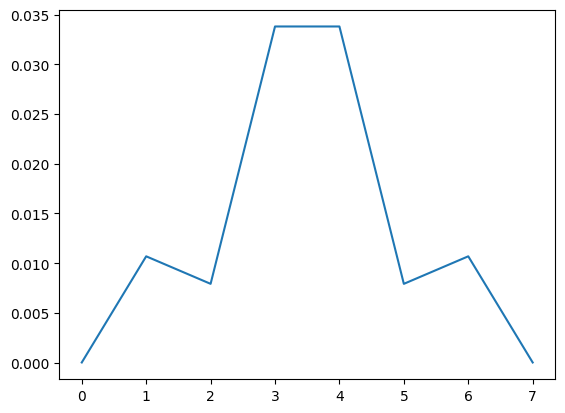

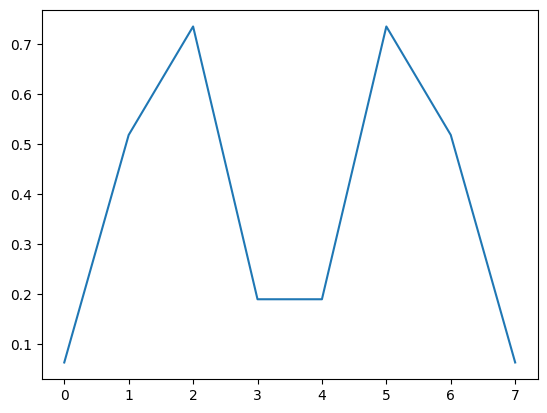

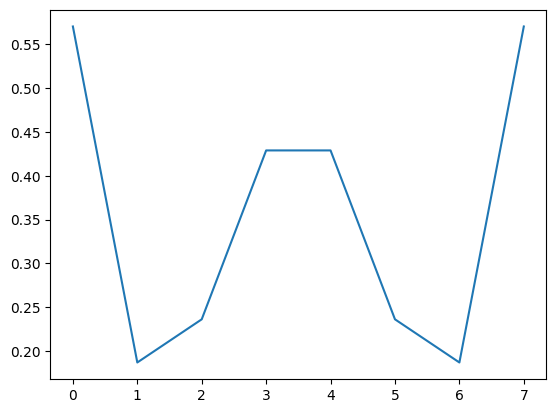

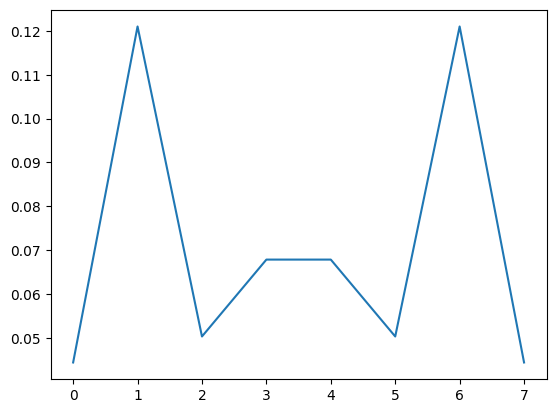

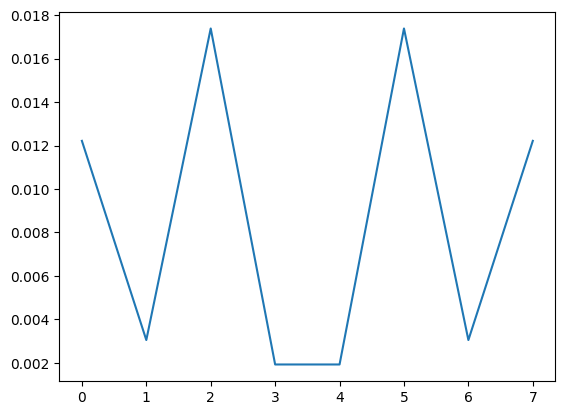

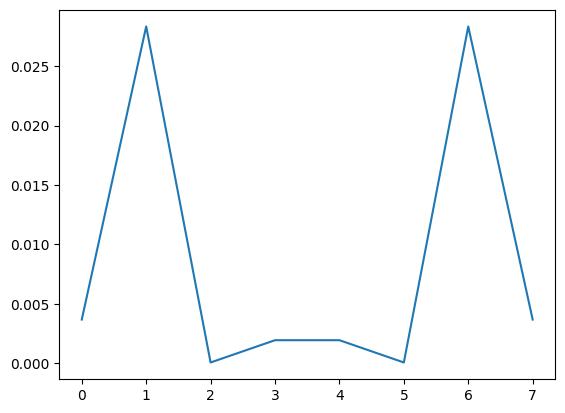

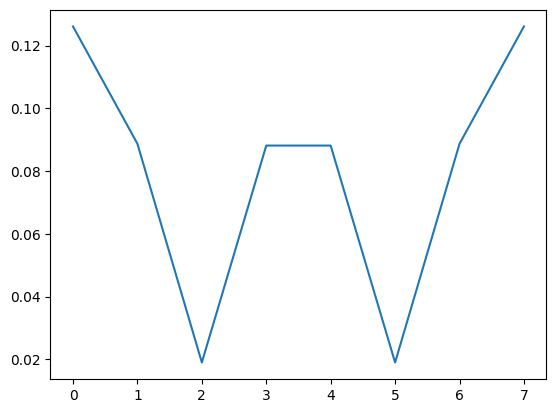

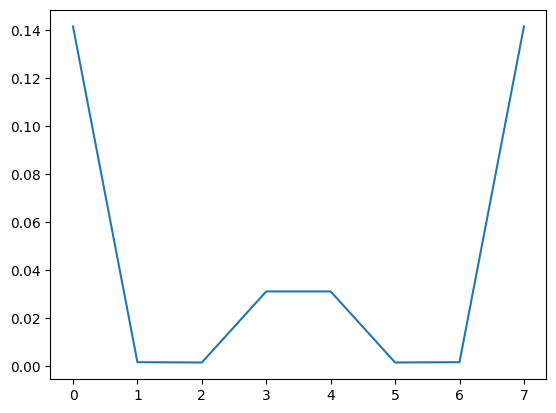

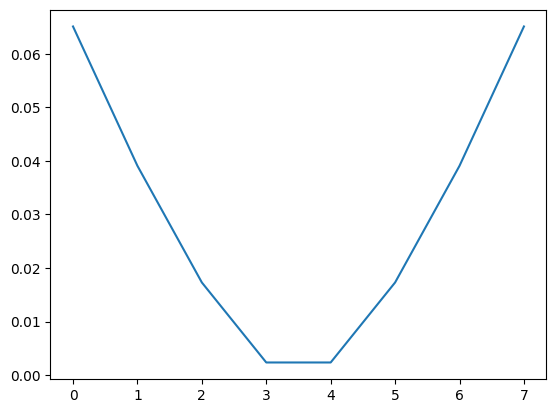

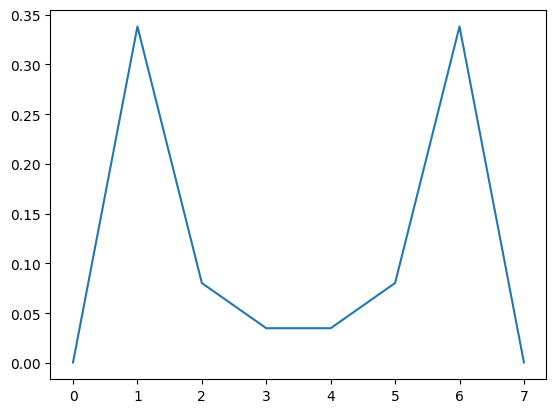

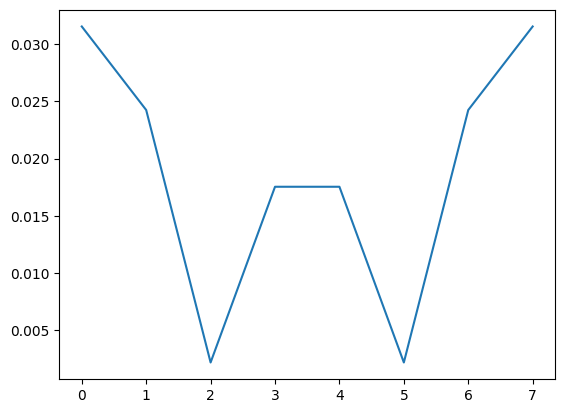

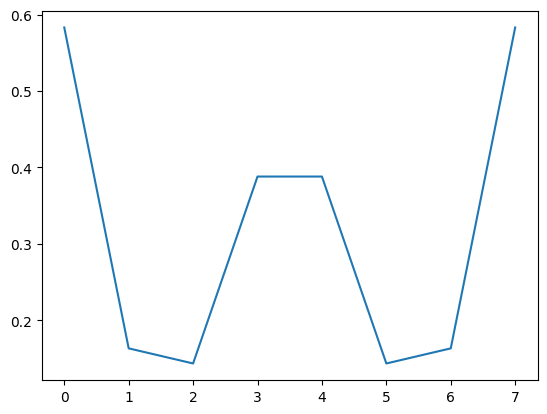

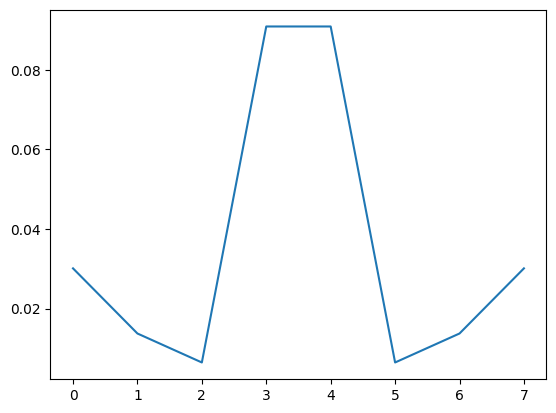

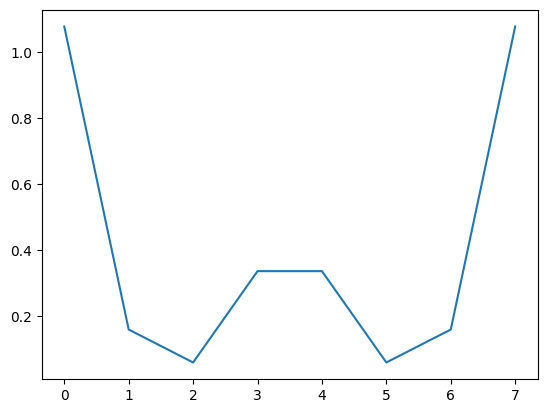

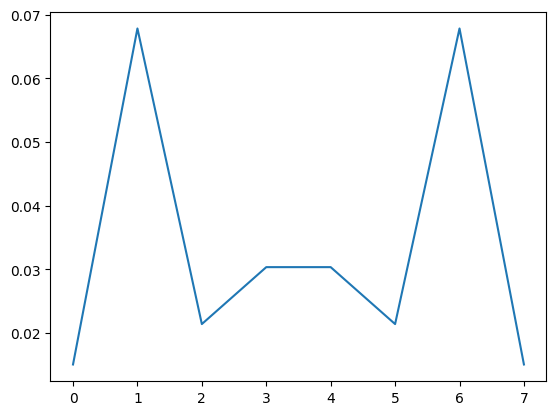

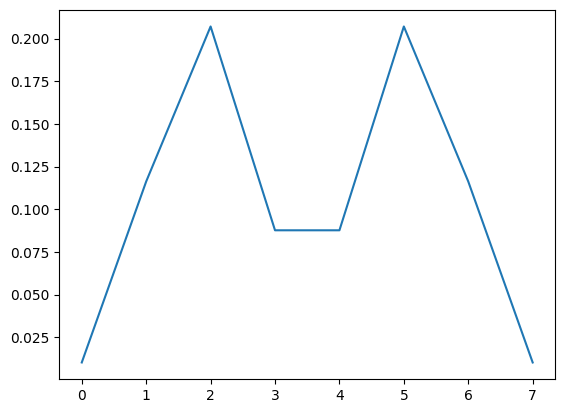

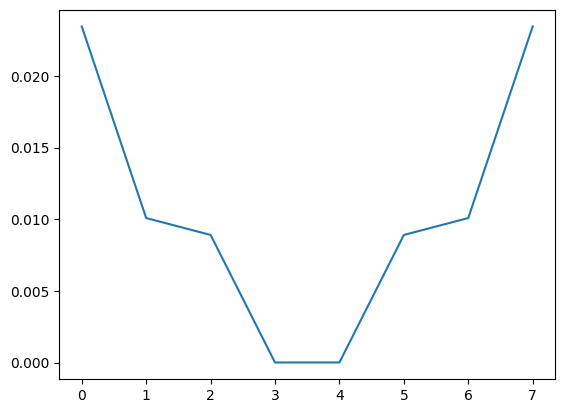

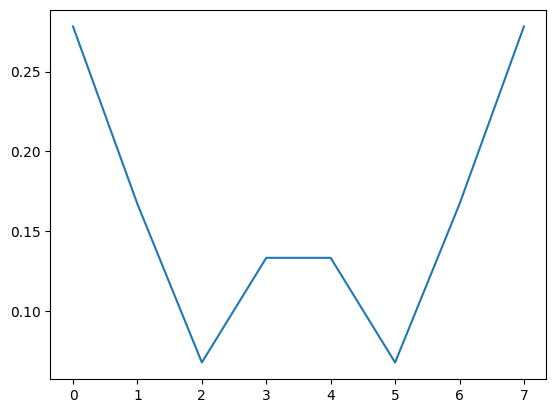

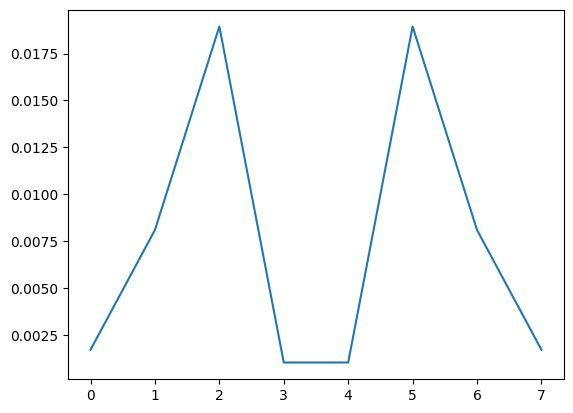

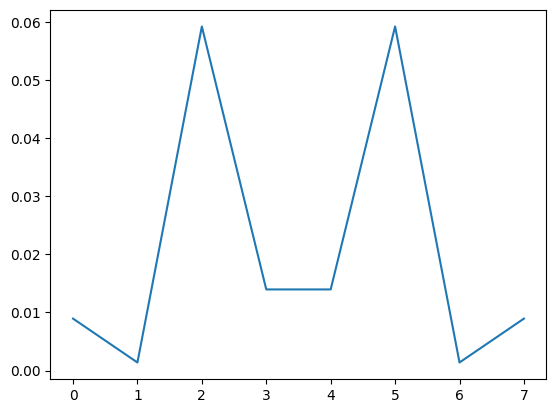

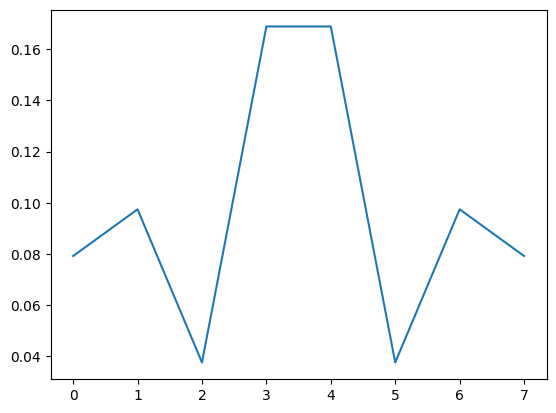

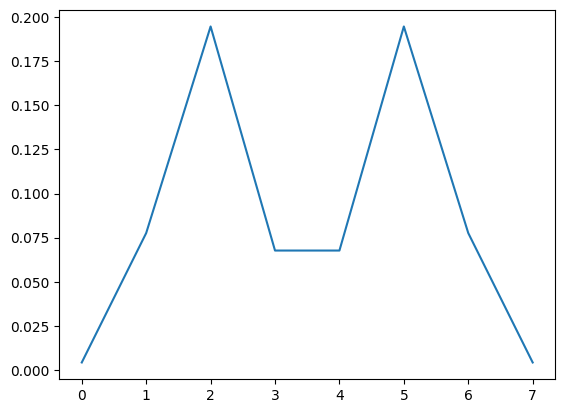

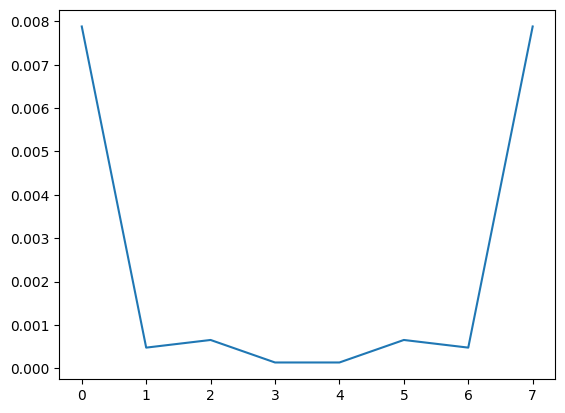

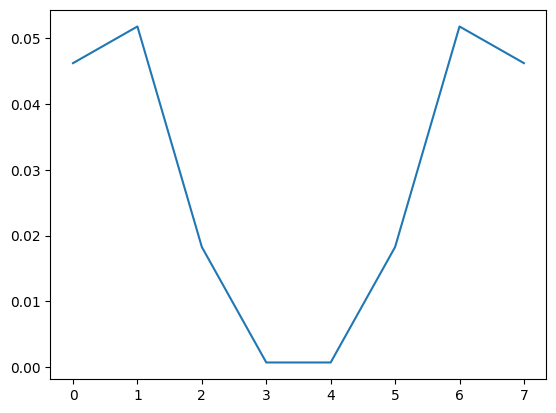

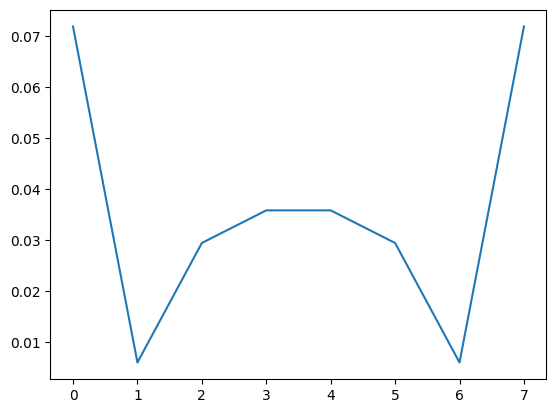

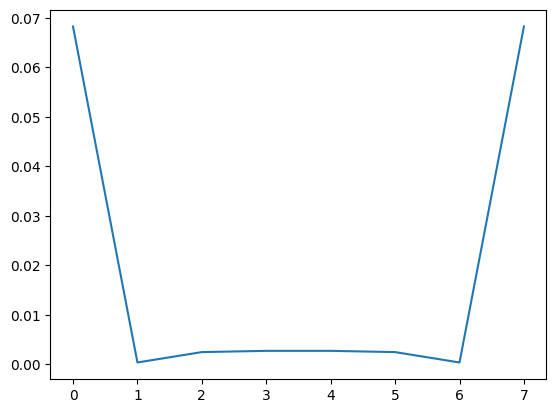

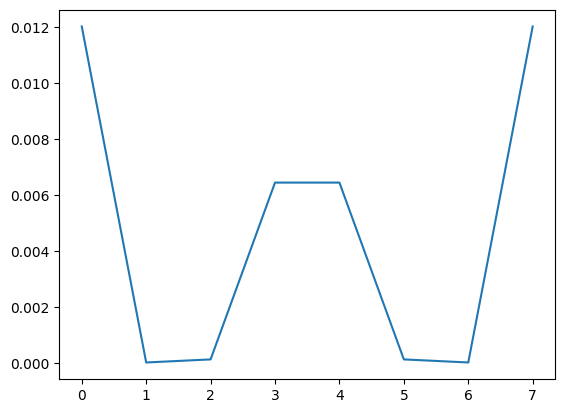

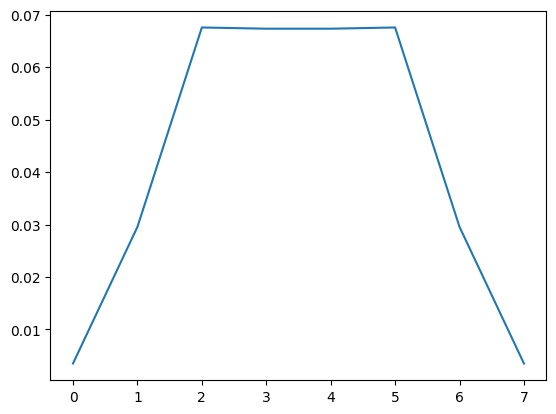

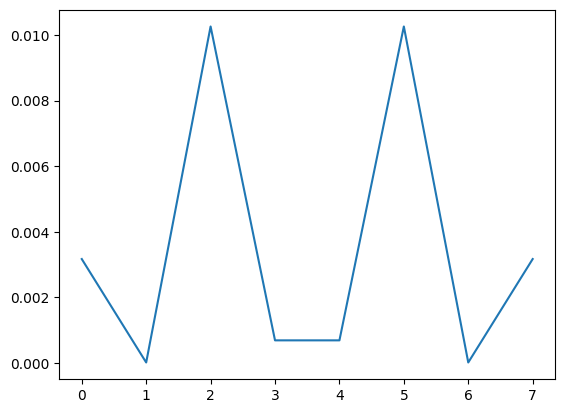

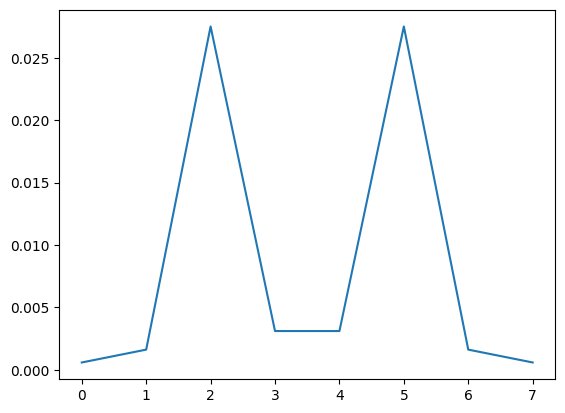

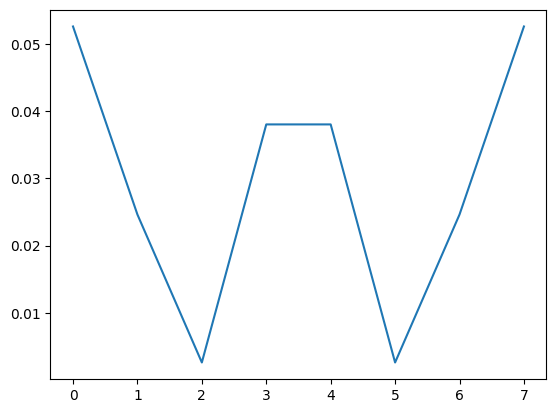

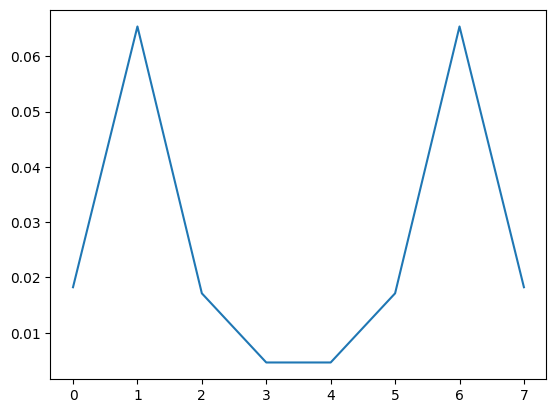

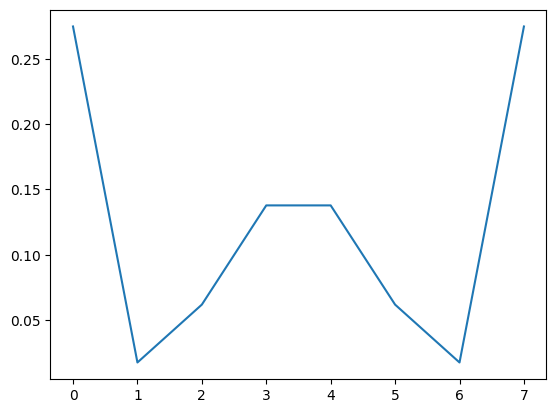

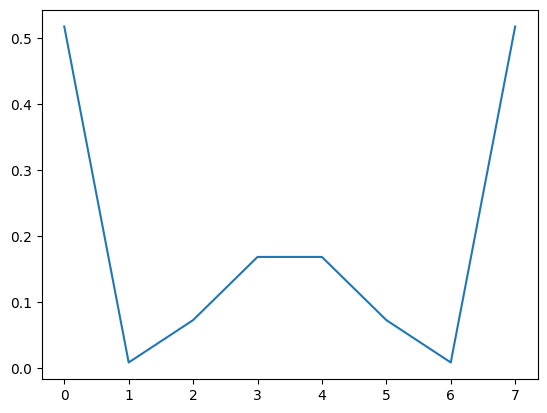

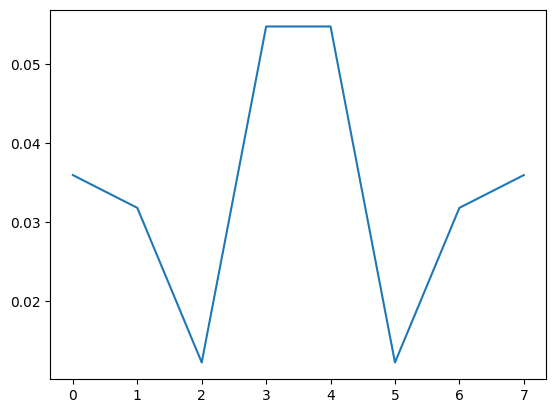

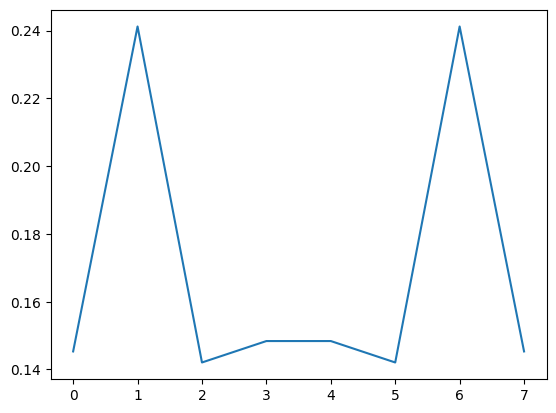

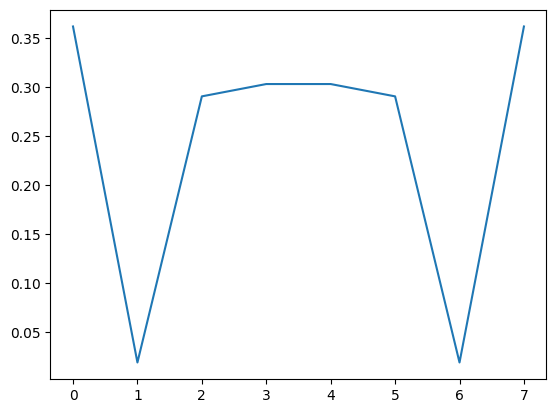

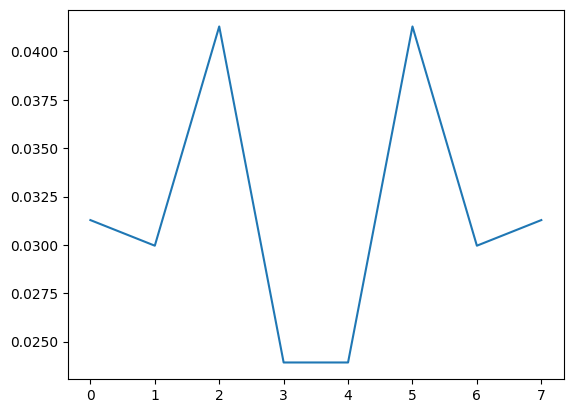

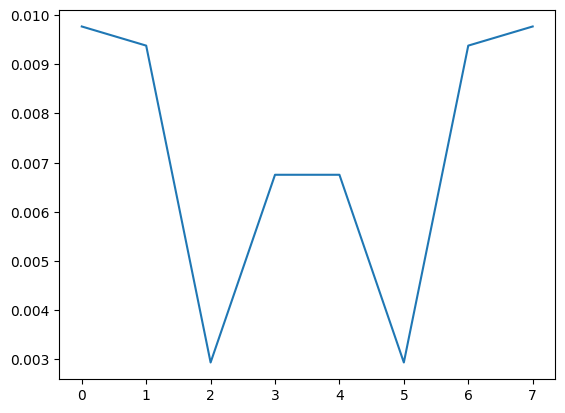

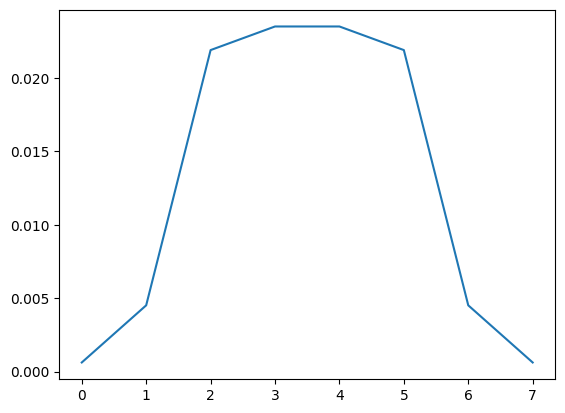

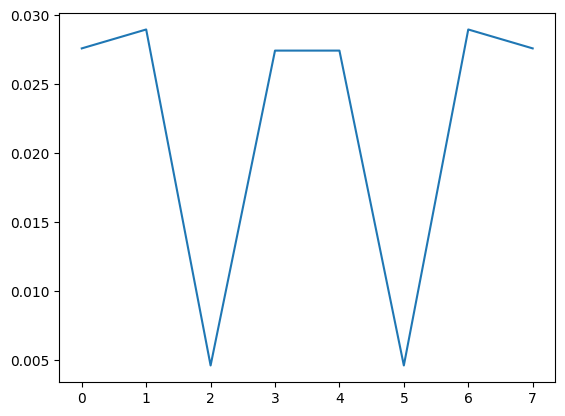

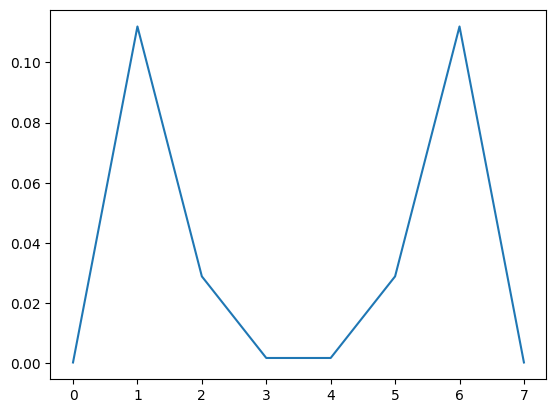

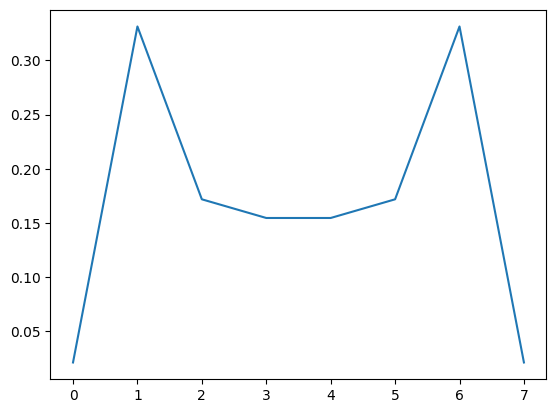

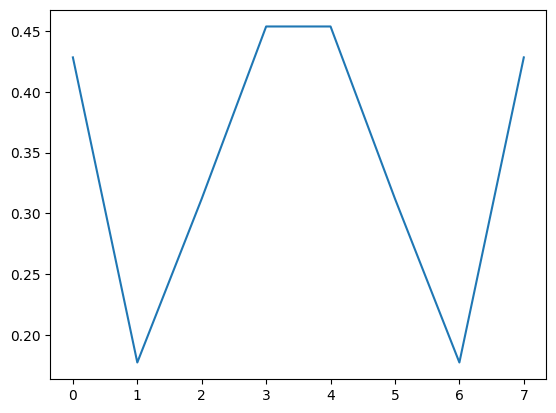

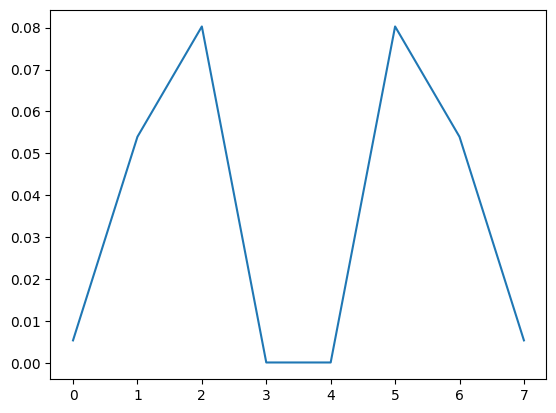

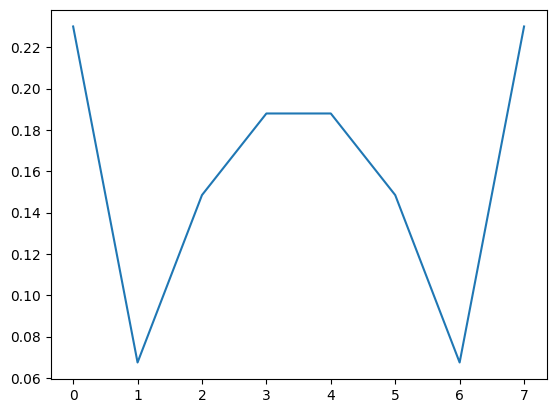

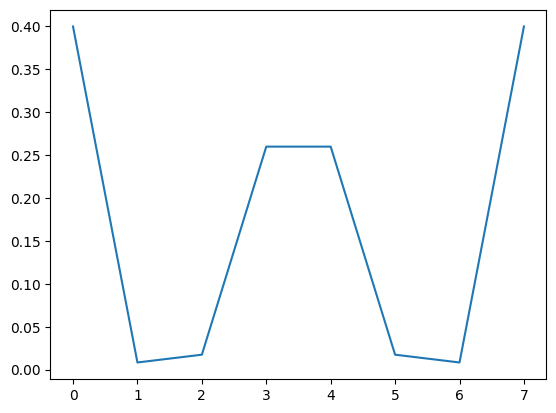

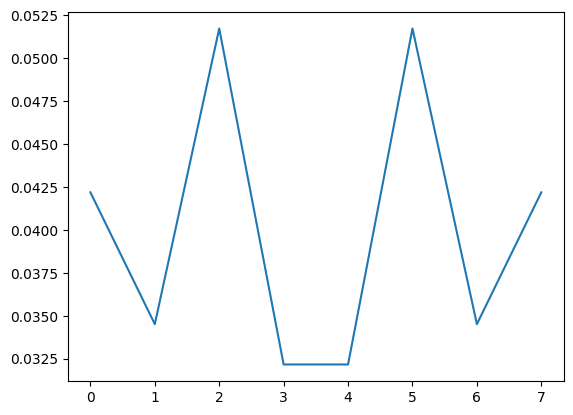

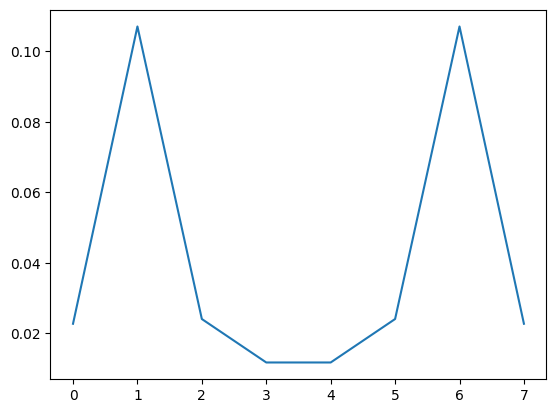

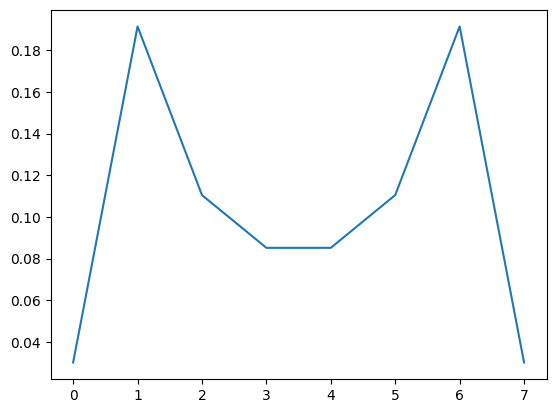

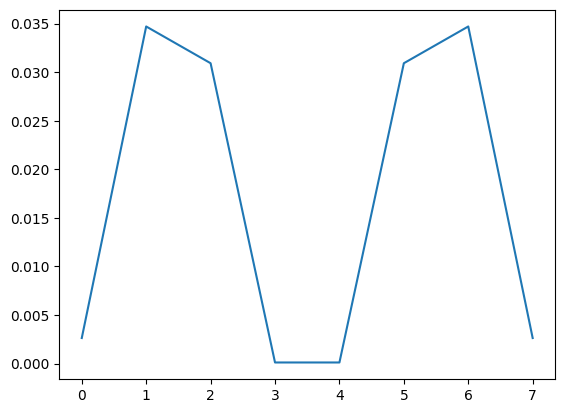

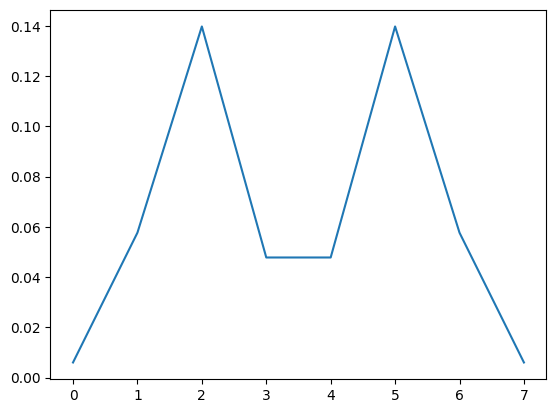

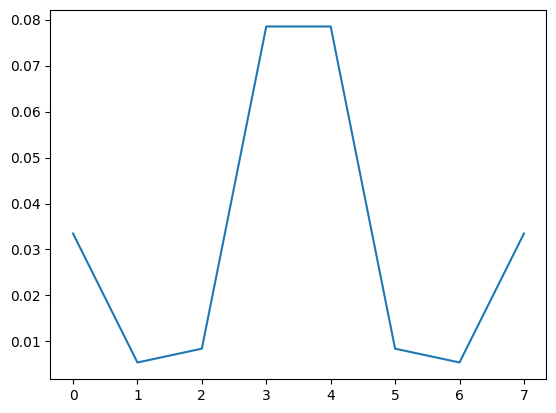

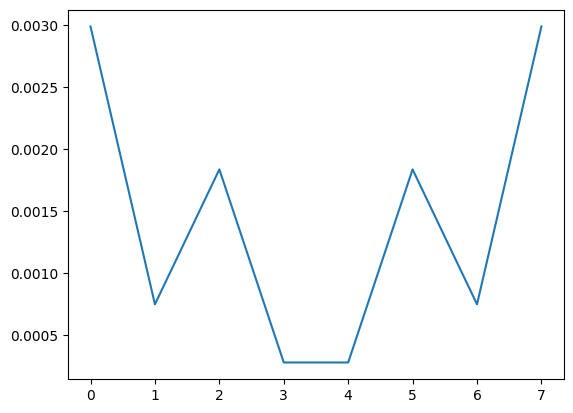

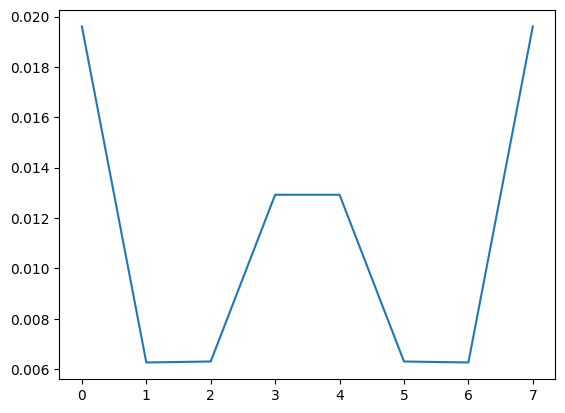

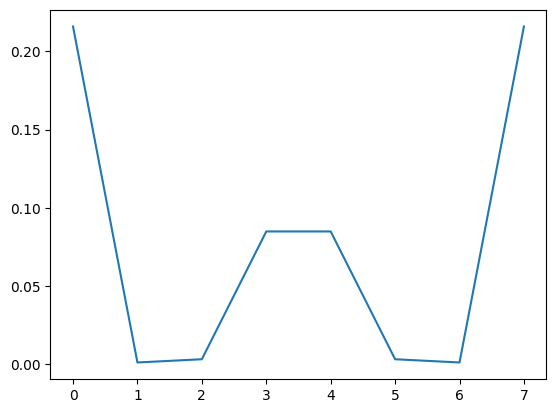

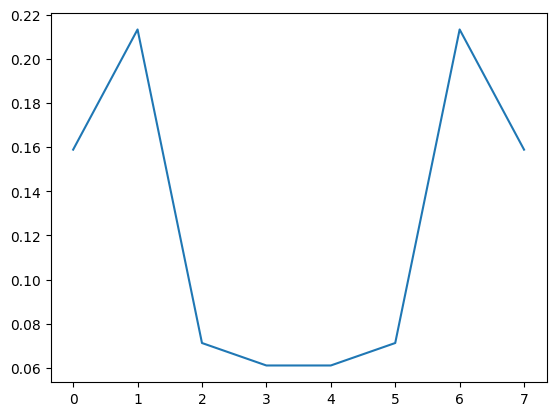

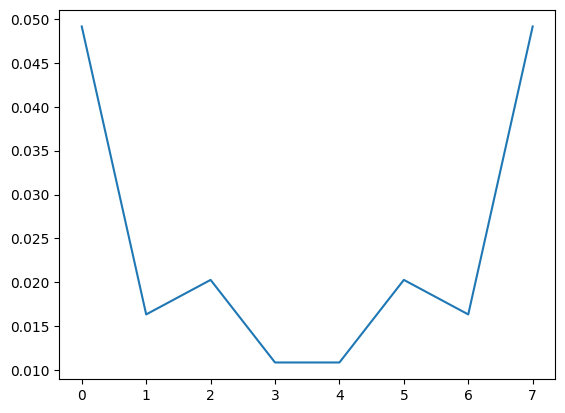

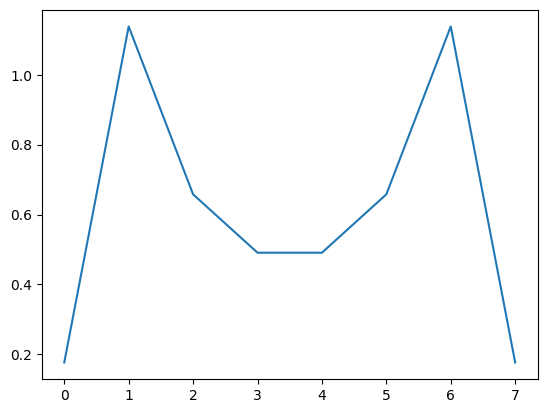

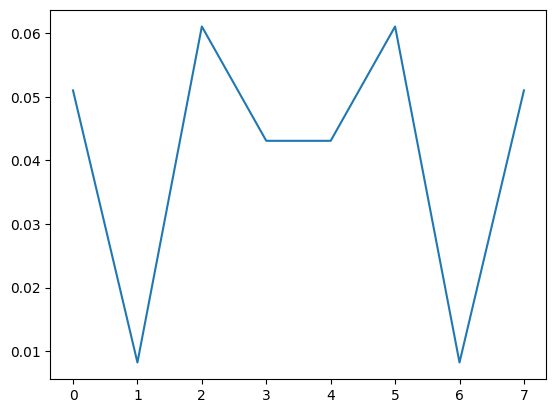

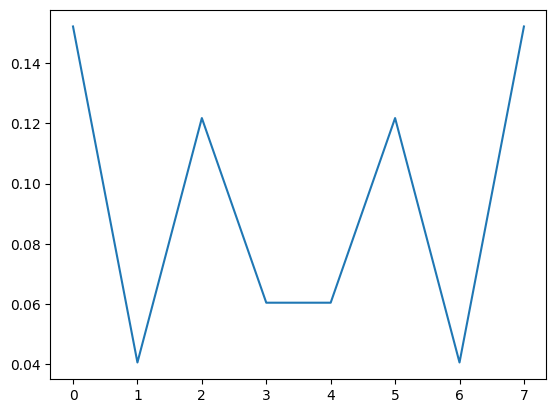

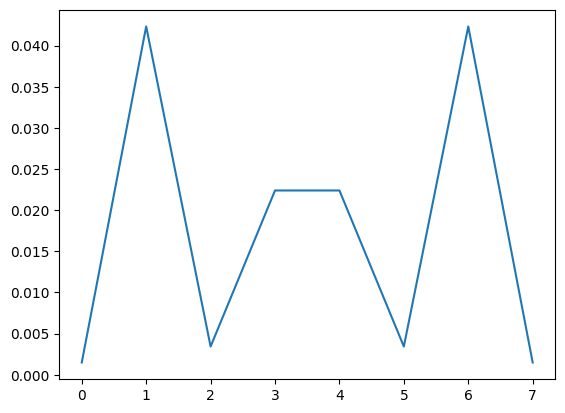

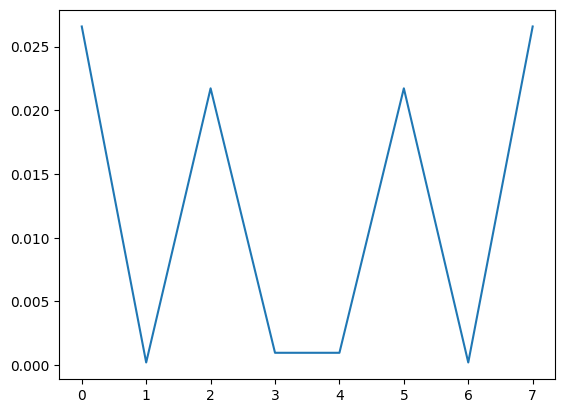

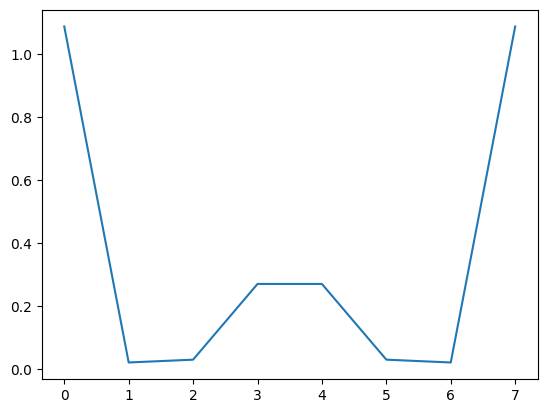

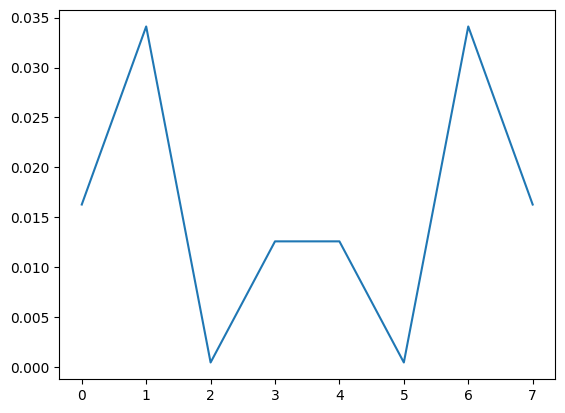

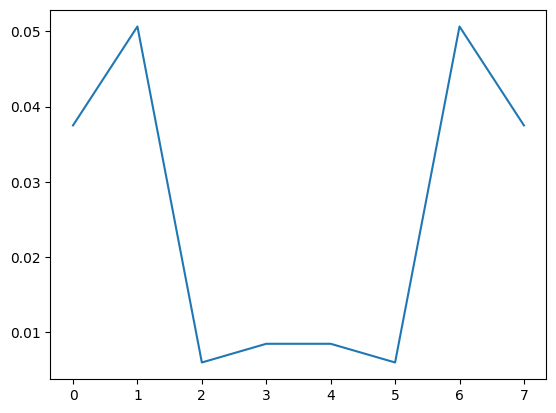

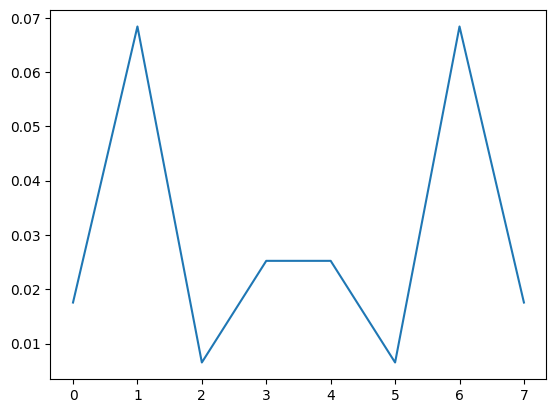

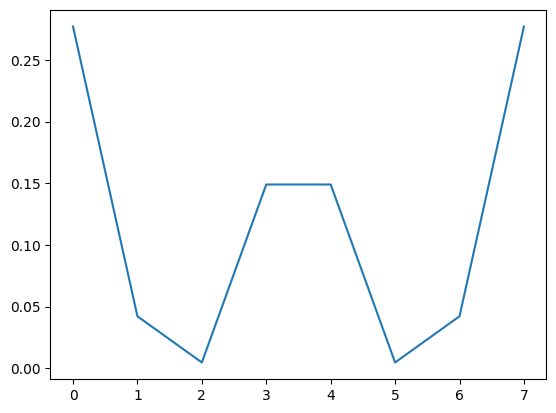

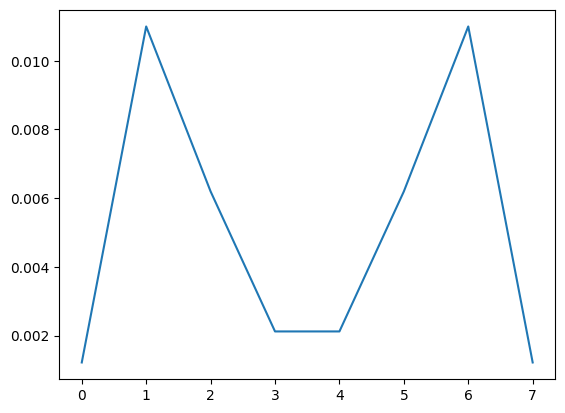

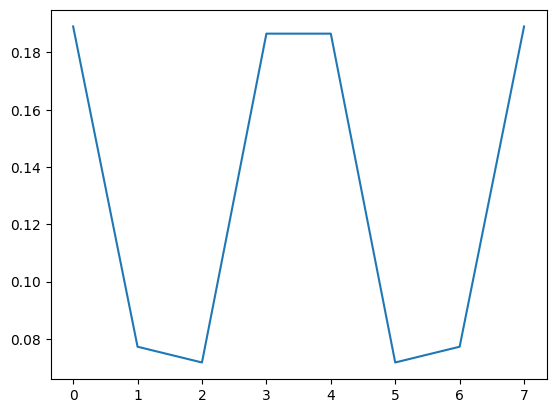

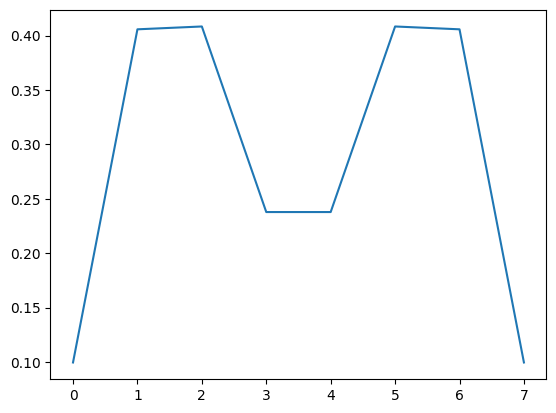

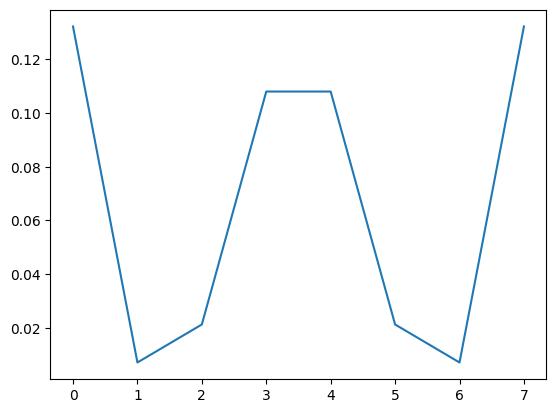

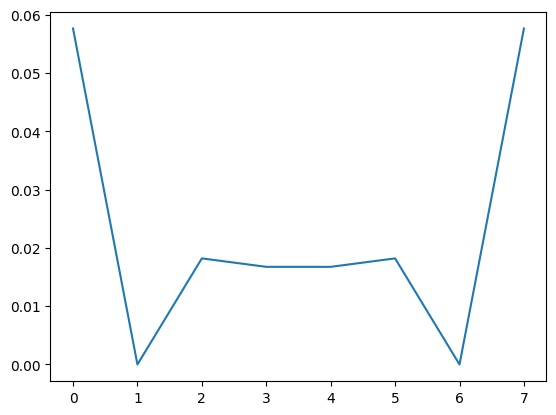

In [27]:
site_pos = np.arange(tot_sites)
print(site_pos)
for state in topo_e_vec_ps_wo_spin:

    plt.plot(site_pos, (state[0:8] + state[8:16])**2)
    plt.show()

In [8]:
e_val_sort = np.sort(np.abs(e_val))

count = 0
for i in e_val_sort:
    if i < 2*(10**(-10)):
        print(i)
        count += 1
print(count)

1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.7725038561132662e-15
1.772503856